<a href="https://colab.research.google.com/github/annettembeyu/data_cleaning_-_exploratory_data_analysis_in_R./blob/main/Moringa_School_DSC_week12_Annette_Ngao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Advertsing Research

## Defining the Research Question


*   Identify which individuals are most likely to click on the ads. 




## Context

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads. 

## Metric of Success

The research will have achieved its objective when:

*  individuals who have a high likelihood of clicking the ads are correctly identified.

## Details of the data

The dataset has 1000 rows and 10 columns. The attributes in the data are as follows:

*  Daily Time Spent on Site
*  Age
*  Area Income
*  Daily Internet Usage
*  Ad Topic Line
*  City
*  Male
*  Country
*  Timestamp
*  Clicked on Ad


The target variable being Clicked on Ad. 

## Data appropriateness

The information gathered on the indivuals was sufficient enough in making basic conclusion on the which individual is more likely to click an ad.

## Experimental Design

*  Loading and previewing the dataset 
*  Data Description
*  Data Cleaning;
Anomalies in the data(find and deal with them):
   *  Missing values.
   *  Outliers.
   *  Duplicates.
*  Univariate Graphical Exploratory Data Analysis
*  Bivariate Graphical Exploratory Data Analysis
*  Conclusion
*  Recommendation

   

## Loading and previewing the dataset 

In [1]:
# Loading the relevant library necessary to read the data in the correct format
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# Loading the dataset
adverts <- read_csv(file = 'advertising.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  `Daily Time Spent on Site` = col_double(),
  Age = col_double(),
  `Area Income` = col_double(),
  `Daily Internet Usage` = col_double(),
  `Ad Topic Line` = col_character(),
  City = col_character(),
  Male = col_double(),
  Country = col_character(),
  Timestamp = col_datetime(format = ""),
  `Clicked on Ad` = col_double()
)




In [3]:
# Changin the column names to a suitable format
names(adverts) <- str_replace_all(names(adverts), c(" " = "_"))
names(adverts) <- tolower(names(adverts))

In [4]:
# previewing the dataset by looking at the first 10 rows
head(adverts)

daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [5]:
# Looking at the tail of the dataset(last 10 rows of the dataset)
tail(adverts)

daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [6]:
# picking a random sample of the data
sample(adverts)

age,ad_topic_line,daily_time_spent_on_site,area_income,timestamp,city,country,male,daily_internet_usage,clicked_on_ad
<dbl>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
35,Cloned 5thgeneration orchestration,68.95,61833.90,2016-03-27 00:53:11,Wrightburgh,Tunisia,0,256.09,0
31,Monitored national standardization,80.23,68441.85,2016-04-04 01:39:02,West Jodi,Nauru,1,193.77,0
26,Organic bottom-line service-desk,69.47,59785.94,2016-03-13 20:35:42,Davidton,San Marino,0,236.50,0
29,Triple-buffered reciprocal time-frame,74.15,54806.18,2016-01-10 02:31:19,West Terrifurt,Italy,1,245.89,0
35,Robust logistical utilization,68.37,73889.99,2016-06-03 03:36:18,South Manuel,Iceland,0,225.58,0
23,Sharable client-driven software,59.99,59761.56,2016-05-19 14:30:17,Jamieberg,Norway,1,226.74,0
33,Enhanced dedicated support,88.91,53852.85,2016-01-28 20:59:32,Brandonstad,Myanmar,0,208.36,0
48,Reactive local challenge,66.00,24593.33,2016-03-07 01:40:15,Port Jefferybury,Australia,1,131.76,1
30,Configurable coherent function,74.53,68862.00,2016-04-18 09:33:42,West Colin,Grenada,1,221.51,0


 ## Data Description

In [8]:
# previewing the dataset to get the details
print('The datatypes of the attributes in the dataset:');str(adverts)
print('The number of columns and rows consecutively are:');dim(adverts)
print('The format of the dataset:');class(adverts)

[1] "The datatypes of the attributes in the dataset:"
tibble [1,000 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ daily_time_spent_on_site: num [1:1000] 69 80.2 69.5 74.2 68.4 ...
 $ age                     : num [1:1000] 35 31 26 29 35 23 33 48 30 20 ...
 $ area_income             : num [1:1000] 61834 68442 59786 54806 73890 ...
 $ daily_internet_usage    : num [1:1000] 256 194 236 246 226 ...
 $ ad_topic_line           : chr [1:1000] "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ city                    : chr [1:1000] "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ male                    : num [1:1000] 0 1 0 1 0 1 0 1 1 1 ...
 $ country                 : chr [1:1000] "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ timestamp               : POSIXct[1:1000], format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ clicked_on_ad           : num [1:1000] 0 0 0 0 0

[1] 1000   10

[1] "The format of the dataset:"


[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

The dataset has 1000 rows and ten columns and it is in dataframe format.

In [9]:
# summary of the different data types in the dataset
table(unlist(lapply(adverts, class)))


character   numeric   POSIXct    POSIXt 
        3         6         1         1 

**Observation**: In summary the dataset has three(3) attributes which have the character datatype, three(6) being integer, three(3) are numeric and one date time.

In [10]:
# Identifying numeric columns
num_cols <- unlist(lapply(adverts, is.numeric))     
num_cols

daily_time_spent_on_site                      age              area_income 
                    TRUE                     TRUE                     TRUE 
    daily_internet_usage            ad_topic_line                     city 
                    TRUE                    FALSE                    FALSE 
                    male                  country                timestamp 
                    TRUE                    FALSE                    FALSE 
           clicked_on_ad 
                    TRUE

In [11]:
 # Subset numeric columns of data
data_num <- adverts[ , num_cols]                       
data_num 

daily_time_spent_on_site,age,area_income,daily_internet_usage,male,clicked_on_ad
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
68.95,35,61833.90,256.09,0,0
80.23,31,68441.85,193.77,1,0
69.47,26,59785.94,236.50,0,0
74.15,29,54806.18,245.89,1,0
68.37,35,73889.99,225.58,0,0
59.99,23,59761.56,226.74,1,0
88.91,33,53852.85,208.36,0,0
66.00,48,24593.33,131.76,1,1
74.53,30,68862.00,221.51,1,0


In [12]:
# dropping ireelevant columns that do not make sense when making statisticla summaries
nums= subset(data_num, select = -c(male,clicked_on_ad))
head(nums)

daily_time_spent_on_site,age,area_income,daily_internet_usage
<dbl>,<dbl>,<dbl>,<dbl>
68.95,35,61833.90,256.09
80.23,31,68441.85,193.77
69.47,26,59785.94,236.50
74.15,29,54806.18,245.89
68.37,35,73889.99,225.58
59.99,23,59761.56,226.74


In [13]:
# Statistical summaries for the numerical columns
summary(nums)

 daily_time_spent_on_site      age         area_income    daily_internet_usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       

## Data Cleaning

In [14]:
# putting the dataset in the global environment
attach(adverts)

### Missing values in the dataset

In [15]:
# Checking if there are any missing values in the dataset
is.na(adverts)

daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [16]:
# Obtaining the number of missing values in the data 
colSums(is.na(adverts))

daily_time_spent_on_site                      age              area_income 
                       0                        0                        0 
    daily_internet_usage            ad_topic_line                     city 
                       0                        0                        0 
                    male                  country                timestamp 
                       0                        0                        0 
           clicked_on_ad 
                       0

***Observation*** There are no missing values in the dataset.

### Outlier detection and Removal

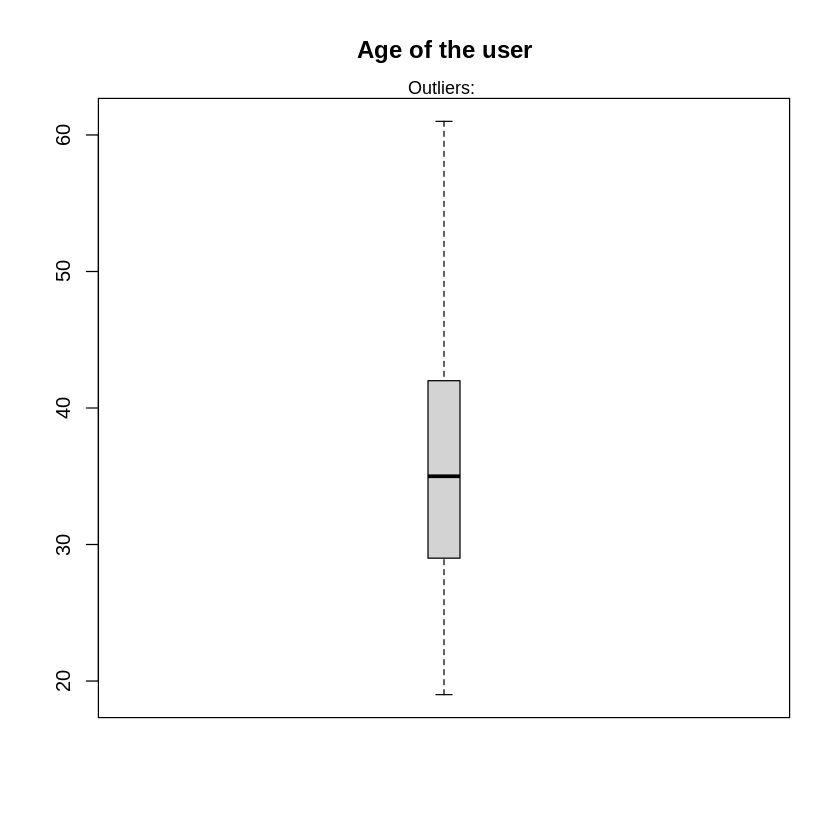

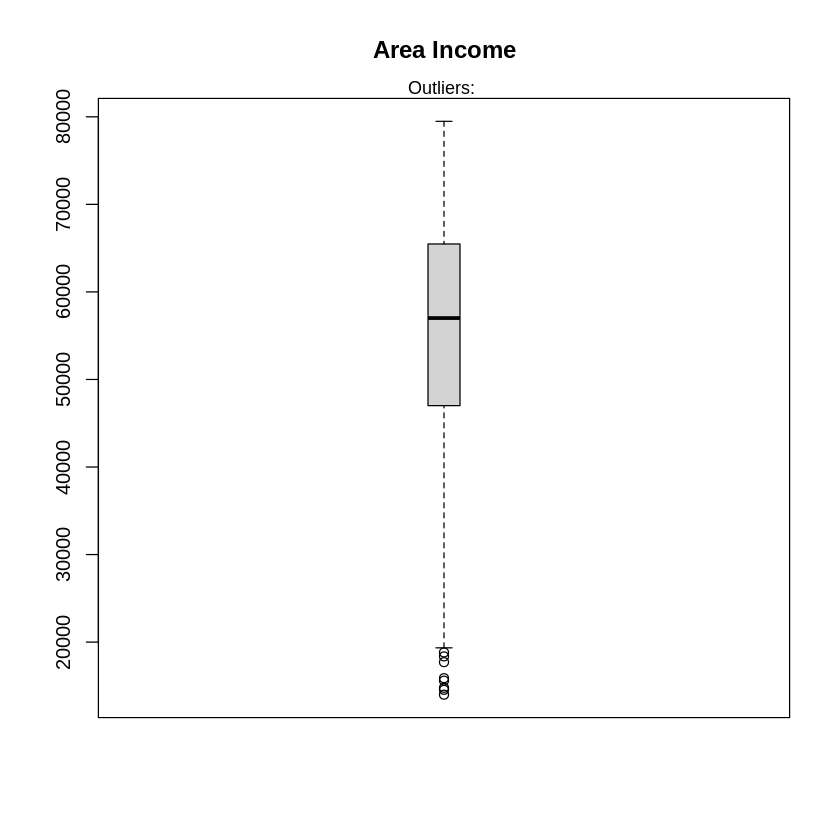

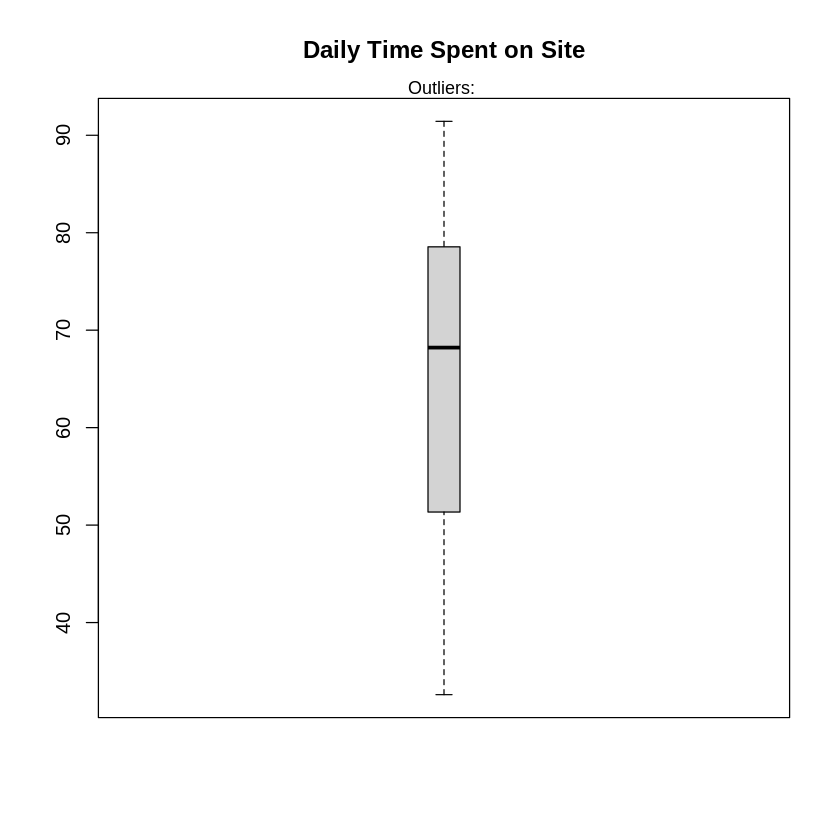

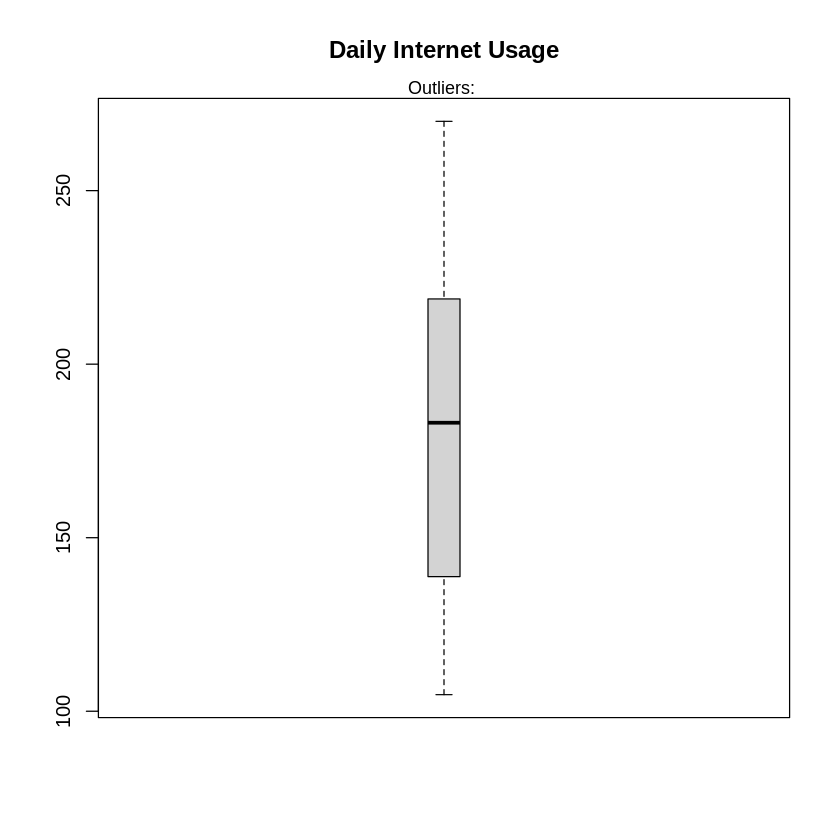

In [17]:
# visualise any existing outliers using boxplots
# Box plot for the age of the user
boxplot(age, main="Age of the user", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Boxplot for area income
boxplot(area_income, main="Area Income", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Boxplot for Daily Time Spent on Site
boxplot(daily_time_spent_on_site, main="Daily Time Spent on Site", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)
# Boxplot for Daily.Internet.Usage
boxplot(daily_internet_usage, main="Daily Internet Usage", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)

**Observation**: Area Income has outliers evidenced by the data points that lie beyond the whisker

In [18]:
# Finding outiers in the dataset
print('Outlier values in Daily Time Spent on Site');boxplot.stats(daily_time_spent_on_site)$out
print('Outlier values in Age');boxplot.stats(age)$out
print('Outlier values in Area Income');boxplot.stats(area_income)$out 
print('Outlier values in Daily Internet Usage'); boxplot.stats(daily_internet_usage)$out

[1] "Outlier values in Daily Time Spent on Site"


numeric(0)

[1] "Outlier values in Age"


numeric(0)

[1] "Outlier values in Area Income"


[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

[1] "Outlier values in Daily Internet Usage"


numeric(0)

**Observation**: This confirms that Area income has outliers.

In [19]:
# Obtaining the value of outlier in area income
install.packages("outliers")
library(outliers)
outlier(area_income)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 13996.5

In [20]:
# Test for outliers
test <- grubbs.test(area_income)
test


	Grubbs test for one outlier

data:  area_income
G = 3.05662, U = 0.99064, p-value = 1
alternative hypothesis: lowest value 13996.5 is an outlier


**Observation**: From the result, reject the null hypothesis. There is significant evidence to support the conclusion that the value 13996.5 is indeed an outlier.

In [21]:
# Dealing with outlier in Area Income
x <- area_income
qnt <- quantile(x, probs=c(.25, .75), na.rm = T)
caps <- quantile(x, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(x, na.rm = T)
x[x < (qnt[1] - H)] <- caps[1]
x[x > (qnt[2] + H)] <- caps[2]

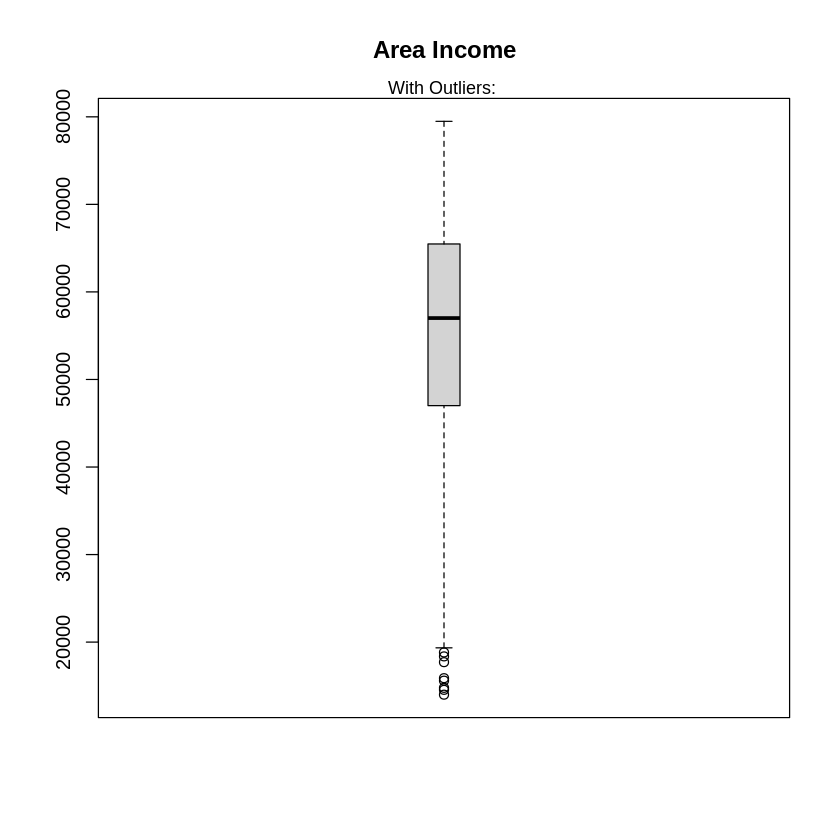

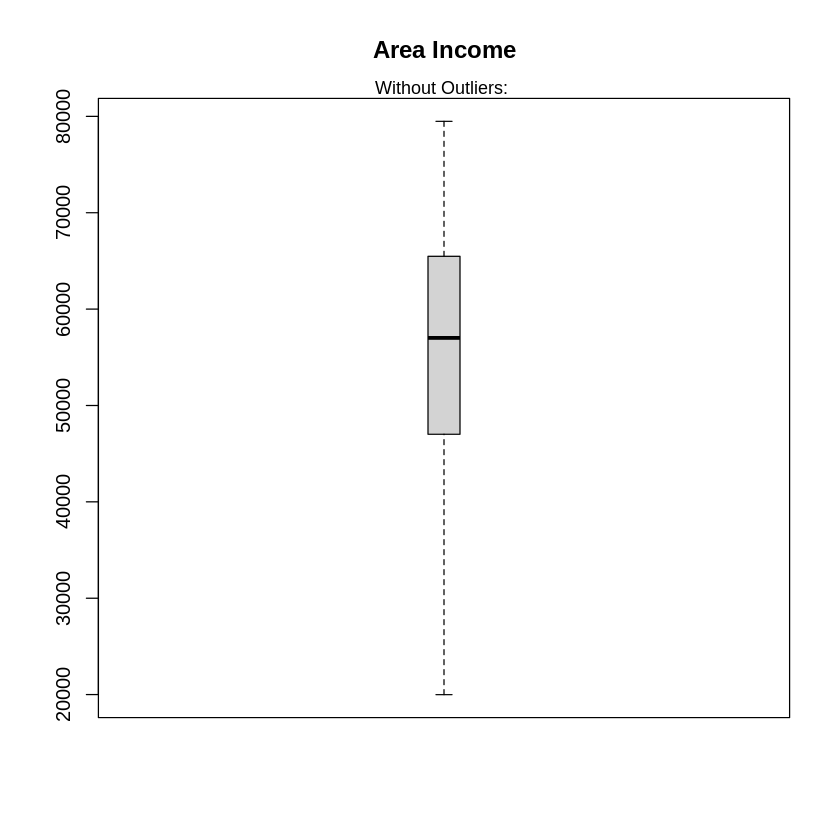

In [22]:
# Boxplot for area income with outliers
boxplot(area_income, main="Area Income", boxwex=0.1)
mtext(paste("With Outliers: "), cex=0.9)

# Box plot of the Area Income after removing outliers
boxplot(x, main="Area Income", boxwex=0.1)
mtext(paste("Without Outliers: "), cex=0.9)

In [23]:
# Comparing the mean of Area Income before removing outliers and after removing outliers
print('Mean of Area Income with outliers:');mean(area_income)
print('Mean of Area Income without outliers:'); mean(x)

[1] "Mean of Area Income with outliers:"


[1] 55000

[1] "Mean of Area Income without outliers:"


[1] 55105.44

In [24]:
# looking at the summary statistics for the Area Income with(out) outliers
print("Summary statistics without outliers");summary(x)
print("Summary statistics with outliers");summary(area_income)

[1] "Summary statistics without outliers"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19992   47032   57012   55105   65471   79485 

[1] "Summary statistics with outliers"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13996   47032   57012   55000   65471   79485 

**Obsevation** The presence of outliers in a dataset can result to wrong conclusion as evidenced by the difference in the mean of the attribute.

### Detection and elimination of duplicates

In [25]:
# Checking for duplicates in the dataset
duplicates <- adverts[duplicated(adverts),]
duplicates

daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>


**Observation**; From the output it clearly indicates that there are no duplicates.

# Univariate Graphical Exploratory Data Analysis

### Measures of Central Tendency

In [26]:
# Finding the measures of central tendecy for Age 
print('The mean and median of age consecutively:'); mean(age); median(age);
a <- age
sort(table(a))
print('The mode of Age is');names(table(a))[table(a)==max(table(a))]

[1] "The mean and median of age consecutively:"


[1] 36.009

[1] 35

a
61 56 59 58 60 19 20 21 57 55 54 53 51 22 47 52 48 46 49 23 50 24 44 43 42 25 
 1  2  2  4  4  6  6  6  6  7  9 10 12 13 13 15 16 18 18 19 20 21 21 23 26 27 
39 45 41 27 37 40 26 38 32 30 34 35 33 28 29 36 31 
30 30 32 33 36 36 37 37 38 39 39 39 43 48 48 50 60 

[1] "The mode of Age is"


[1] "31"

In [27]:
# Finding the measures of central tendecy for Daily Time Spent on Site
print('The mean and median of Daily Time Spent on Site consecutively:'); mean(daily_time_spent_on_site); median(daily_time_spent_on_site);
d <- daily_time_spent_on_site
sort(table(d))
print('The mode of Daily Time Spent on Site is');names(table(d))[table(d)==max(table(d))]

[1] "The mean and median of Daily Time Spent on Site consecutively:"


[1] 65.0002

[1] 68.215

d
32.84 32.91 32.99 33.21 33.33 33.52 34.04  34.3 34.66 34.78 34.86 34.87 34.96 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   35 35.11 35.21 35.25 35.33 35.34 35.55 35.61 35.65 35.76 35.79 36.08 36.31 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
36.37 36.44 36.49 36.56 36.62 36.73 36.87 36.91 36.98    37 37.01 37.05 37.32 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
37.45 37.47 37.51 37.58 37.65 37.68 37.74 37.75 37.87  38.1 38.37 38.46 38.52 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
38.63 38.65 38.91 38.93 38.94 38.96 39.19 39.25  39.3 39.34 39.36 39.47  39.5 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
39.53 39.56 39.76 39.85 39.87 39.94 40.01 40.04 40.06 40.15 40.17 40.18 40.19 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
40.34 40.42 40.47 40.67 40.88 41.16 41.18 41.28 41

[1] "The mode of Daily Time Spent on Site is"


[1] "62.26" "75.55" "77.05" "78.76" "84.53"

Daily Time Spent on Site is multi-modal.

In [28]:
# Finding the measures of central tendecy for Area Income
print('The mean and median of Area Income consecutively:'); mean(area_income); median(area_income);
i <- area_income
sort(table(i))
print('The mode of Area Income is');names(table(i))[table(i)==max(table(i))]

[1] "The mean and median of Area Income consecutively:"


[1] 55000

[1] 57012.3

i
 13996.5 14548.06  14775.5 15598.29  15879.1 17709.98 18368.57 18819.34 
       1        1        1        1        1        1        1        1 
19345.36 19991.72 20592.99 20856.54 21644.91 21773.22 22205.74 22456.04 
       1        1        1        1        1        1        1        1 
22473.08 23410.75 23821.72 23936.86 23942.61 23975.35 24030.06 24078.93 
       1        1        1        1        1        1        1        1 
24316.61 24593.33  24852.9 25371.52 25408.21 25583.29 25598.75 25603.93 
       1        1        1        1        1        1        1        1 
25682.65 25686.34 25739.09 25767.16 26023.99 26130.93 27073.27  27086.4 
       1        1        1        1        1        1        1        1 
27241.11 27262.51 27508.41  27964.6 28019.09 28028.74 28186.65 28210.03 
       1        1        1        1        1        1        1        1 
28265.81 28271.84 28275.48 28357.27 28387.42 28495.21 28679.93  29359.2 
       1        1        1        1        1     

[1] "The mode of Area Income is"


[1] "13996.5"  "14548.06" "14775.5"  "15598.29" "15879.1"  "17709.98"
   [7] "18368.57" "18819.34" "19345.36" "19991.72" "20592.99" "20856.54"
  [13] "21644.91" "21773.22" "22205.74" "22456.04" "22473.08" "23410.75"
  [19] "23821.72" "23936.86" "23942.61" "23975.35" "24030.06" "24078.93"
  [25] "24316.61" "24593.33" "24852.9"  "25371.52" "25408.21" "25583.29"
  [31] "25598.75" "25603.93" "25682.65" "25686.34" "25739.09" "25767.16"
  [37] "26023.99" "26130.93" "27073.27" "27086.4"  "27241.11" "27262.51"
  [43] "27508.41" "27964.6"  "28019.09" "28028.74" "28186.65" "28210.03"
  [49] "28265.81" "28271.84" "28275.48" "28357.27" "28387.42" "28495.21"
  [55] "28679.93" "29359.2"  "29398.61" "29727.79" "29875.8"  "30227.98"
  [61] "30487.48" "30726.26" "30976"    "31072.44" "31087.54" "31092.93"
  [67] "31215.88" "31265.75" "31281.01" "31343.39" "31523.09" "31947.65"
  [73] "31998.72" "32006.82" "32252.38" "32536.98" "32549.95" "32593.59"
  [79] "32635.7"  "32689.04" "32708.94" "32847.53" "33147.19" "33239.2" 
  [85] "33258.09" "33293.78" "33502.57" "33553.9"  "33601.84" "33813.08"
  [91] "33951.63" "33987.27" "34127.21" "34191.13" "34191.23" "34309.24"
  [97] "34418.09" "34886.01" "34903.67" "34942.26" "35253.98" "35349.26"
 [103] "35350.55" "35466.8"  "35521.88" "35684.82" "35764.49" "36037.33"
 [109] "36424.94" "36497.22" "36752.24" "36782.38" "36834.04" "36884.23"
 [115] "36913.51" "37212.54" "37334.78" "37345.24" "37345.34" "37605.11"
 [121] "37713.23" "37838.72" "37908.29" "38067.08" "38260.89" "38349.78"
 [127] "38427.66" "38609.2"  "38641.2"  "38645.4"  "38745.29" "38817.4" 
 [133] "38987.42" "39031.89" "39131.53" "39132.64" "39193.45" "39211.49"
 [139] "39552.49" "39616"    "39699.13" "39723.97" "39799.73" "39809.69"
 [145] "39840.55" "39939.39" "40135.06" "40159.2"  "40182.84" "40183.75"
 [151] "40243.82" "40345.49" "40468.53" "40478.83" "40763.13" "40926.93"
 [157] "41059.64" "41097.17" "41229.16" "41232.89" "41335.84" "41356.31"
 [163] "41417.27" "41521.28" "41547.62" "41629.86" "41768.13" "41851.38"
 [169] "41866.55" "41884.64" "41920.79" "42042.95" "42078.89" "42136.33"
 [175] "42162.9"  "42191.61" "42251.59" "42362.49" "42415.72" "42581.23"
 [181] "42650.32" "42696.67" "42760.22" "42838.29" "42861.42" "42898.21"
 [187] "42907.89" "42993.48" "42995.8"  "43073.78" "43111.41" "43155.19"
 [193] "43241.19" "43241.88" "43299.63" "43313.73" "43386.07" "43444.86"
 [199] "43450.11" "43573.66" "43662.1"  "43698.53" "43708.88" "43778.88"
 [205] "43870.51" "43881.73" "43974.49" "44078.24" "44174.25" "44217.68"
 [211] "44248.52" "44275.13" "44304.13" "44307.18" "44490.09" "44559.43"
 [217] "44893.71" "45400.5"  "45465.25" "45522.44" "45580.92" "45593.93"
 [223] "45632.51" "45716.48" "45800.48" "45945.88" "45959.86" "46004.31"
 [229] "46024.29" "46033.73" "46132.18" "46160.63" "46179.97" "46197.59"
 [235] "46239.14" "46339.25" "46403.18" "46422.76" "46473.14" "46500.11"
 [241] "46557.92" "46653.75" "46693.76" "46722.07" "46737.34" "46780.09"
 [247] "46868.53" "46931.03" "46964.11" "46974.15" "47051.02" "47139.21"
 [253] "47160.53" "47169.14" "47258.59" "47314.45" "47338.94" "47357.39"
 [259] "47391.95" "47447.89" "47510.42" "47575.44" "47638.3"  "47682.28"
 [265] "47708.42" "47861.93" "47929.83" "47968.32" "47997.75" "48098.86"
 [271] "48206.04" "48246.6"  "48335.2"  "48347.64" "48376.14" "48453.55"
 [277] "48467.68" "48537.18" "48554.45" "48679.54" "48758.92" "48761.14"
 [283] "48826.14" "48852.58" "48867.36" "48867.67" "48913.07" "48918.55"
 [289] "49030.03" "49090.51" "49101.67" "49111.47" "49158.5"  "49206.4" 
 [295] "49269.98" "49282.87" "49309.14" "49325.48" "49457.48" "49525.37"
 [301] "49544.41" "49597.08" "49742.83" "49822.78" "49850.52" "49911.25"
 [307] "49942.66" "49957"    "49995.63" "50038.65" "50055.33" "50086.17"
 [313] "50147.72" "50199.77" "50216.01" "50278.89" "50333.72" "50335.46"
 [319] "50337.93" "50356.06" "50439.49" "50457.01" "50468.36" "50491.45"
 [325] "50506.44" "50628.31" "50666.5"  "50671.6"  "50711.68"

**Observation**: The observation in Area Income all have a frequency of one hence all the obsevration appear in the mode. One could also conclude that area income has no mode.

In [30]:
# Finding the measures of central tendecy for Daily Internet Usage
print('The mean and median of Daily Internet Usage consecutively:'); mean(daily_internet_usage); median(daily_internet_usage);
u <- daily_internet_usage
sort(table(u))
print('The mode of Daily Internet Usage is');names(table(u))[table(u)==max(table(u))]

[1] "The mean and median of Daily Internet Usage consecutively:"


[1] 180.0001

[1] 183.13

u
104.78    105 105.04 105.15 105.22 105.63 105.69 105.71 105.86 105.94 106.04 
     1      1      1      1      1      1      1      1      1      1      1 
106.86 106.96 107.19 107.56 107.92 108.03  108.1 108.15 108.16 108.17 108.18 
     1      1      1      1      1      1      1      1      1      1      1 
108.25 108.27  108.7 108.85    109 109.04 109.07 109.22 109.29 109.34 109.77 
     1      1      1      1      1      1      1      1      1      1      1 
109.98 110.25 110.57 110.66 110.68 110.84 110.93 111.02 111.59 111.63 111.71 
     1      1      1      1      1      1      1      1      1      1      1 
 111.8 111.94 112.19 112.52 112.72 113.12 113.69  113.7 113.75  113.8 114.53 
     1      1      1      1      1      1      1      1      1      1      1 
114.69 114.85 115.26 115.35 115.37  115.6 115.79 116.07 116.19 116.27 116.38 
     1      1      1      1      1      1      1      1      1      1      1 
116.53 117.33 117.35 117.66 117.75  118.1 118.16 118.27 118.39

[1] "The mode of Daily Internet Usage is"


[1] "113.53" "115.91" "117.3"  "119.3"  "120.06" "125.45" "132.38" "135.24"
 [9] "136.18" "138.35" "158.22" "161.16" "162.44" "164.25" "167.22" "169.4" 
[17] "178.75" "182.65" "190.95" "194.23" "201.15" "211.87" "214.42" "215.18"
[25] "219.72" "222.11" "223.16" "228.81" "230.36" "234.75" "235.28" "236.96"
[33] "247.05" "256.4"

**Observation**: Daily Internet Usage is multimodal.

It is also evident from the measures of central tendecy in Age, Area Income, Daily Internet Usage and Daily Time Spent on site their distributions are not symmetric( Mean != Mode)

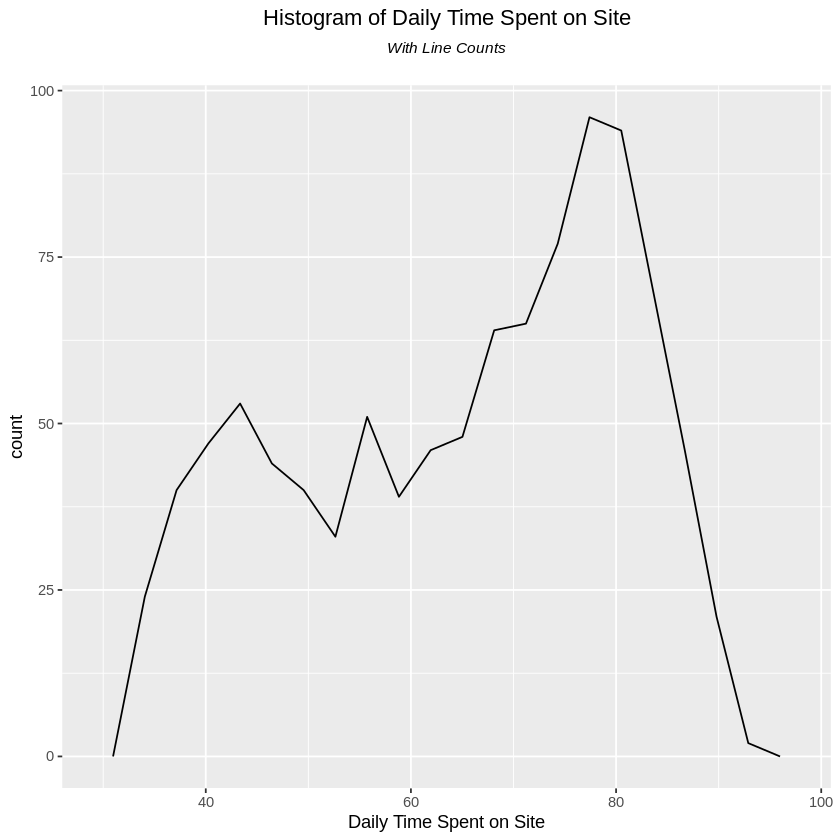

In [31]:
# Histogram of Daily Time Spent on Site displaying count with lines
ggplot(data = adverts, mapping = aes(x = daily_time_spent_on_site)) +
  geom_freqpoly(bins = 20) +
  labs(x = "Daily Time Spent on Site") +
  ggtitle(expression(atop("Histogram of Daily Time Spent on Site", atop(italic("With Line Counts", ""))))) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(plot.subtitle = element_text(hjust = 0.5))

**Observation**:The distribution of Daily Time Spent on Site is skewed to the right which is as a result of different factors which I will unravel futher in the analysis.

In [85]:
# Dividing the age into groups
min(age); max(age)
ages <- floor(runif(9, min = 19 , max = 61))
ages

[1] 19

[1] 61

[1] 44 27 59 31 56 30 42 35 33

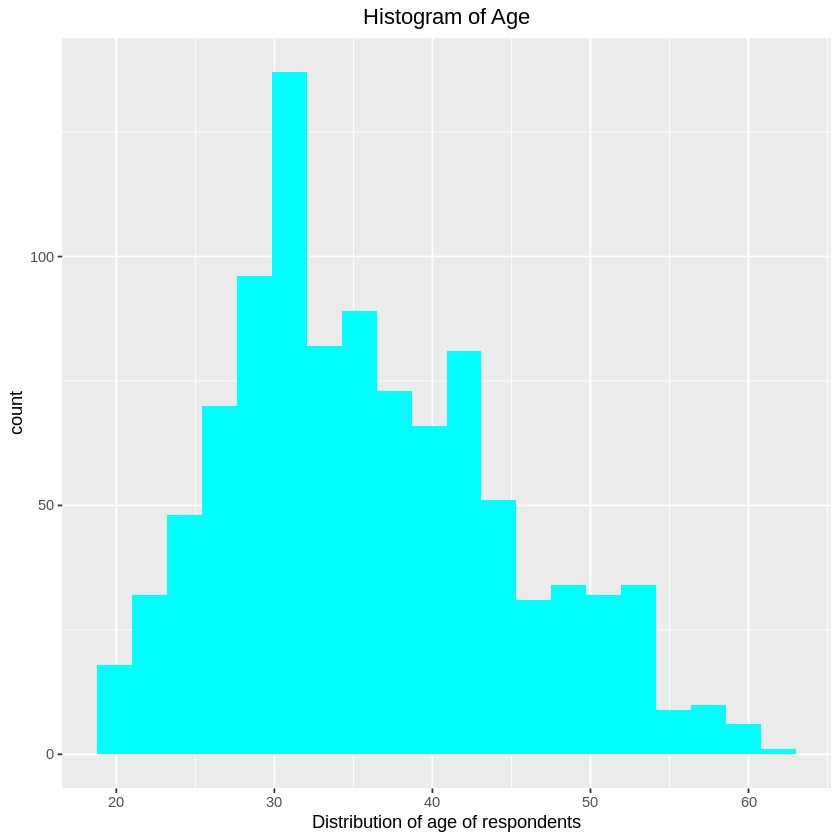

In [32]:
# Histogram of Age
ggplot(data = adverts, mapping = aes(x = age)) +
  geom_histogram(bins = 20, fill = "cyan") +
  labs(x = "Distribution of age of respondents") +
  ggtitle("Histogram of Age") +
  theme(plot.title = element_text(hjust = 0.5))

**Observation**:It is clear from the visual above that the Distribution of the ages of the respondents is skewed to the left. Most of the users frequenting the site are young. 

In [33]:
# Finding the mode of the male as it is a categorical variable
m <- male
sort(table(m))
print('The mode of Male');names(table(m))[table(m)==max(table(m))]

m
  1   0 
481 519 

[1] "The mode of Male"


[1] "0"

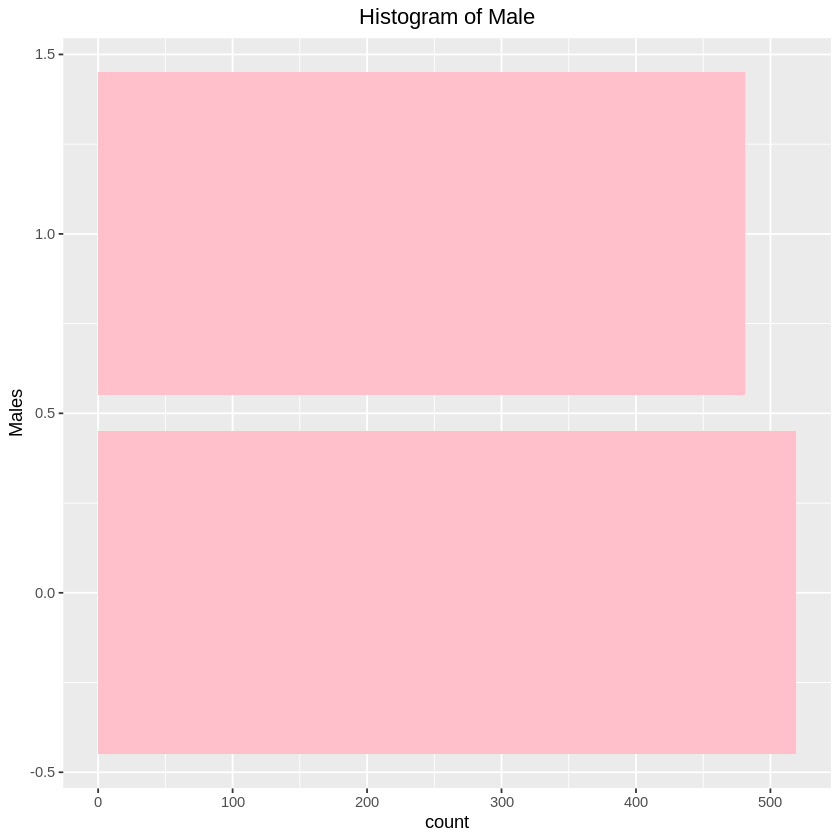

In [77]:
# Bar plot of Males 
ggplot(data = adverts, mapping = aes(x = male)) +
  geom_bar(fill = "pink") + coord_flip() +
  labs(x = "Males") +
  ggtitle("Histogram of Male") +
  theme(plot.title = element_text(hjust = 0.5))

**Observation**: There are slightly more females than there are males who visit the website. The value **1** represents the males and the value **0** represents the females.

In [35]:
# Finding the mode of the male as it is a categorical variable
c <- clicked_on_ad
sort(table(c))
print('The mode of Male');names(table(c))[table(c)==max(table(c))]

c
  0   1 
500 500 

[1] "The mode of Male"


[1] "0" "1"

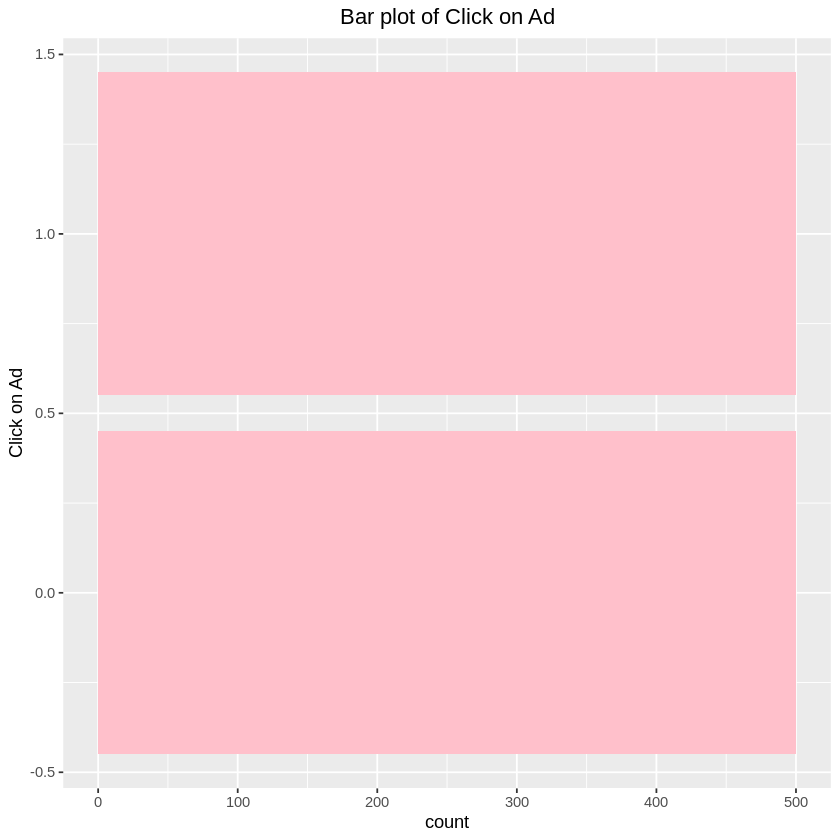

In [76]:
# Bar plot of Click on Ad 
ggplot(data = adverts, mapping = aes(x = clicked_on_ad)) +
  geom_bar(fill = "pink") + coord_flip()+
  labs(x = "Click on Ad") +
  ggtitle("Bar plot of Click on Ad") +
  theme(plot.title = element_text(hjust = 0.5))

**Observation**: Interestingly, there are approximately equal number of individuals who clicked on the Ad and those who did not. Where the value **1** represents clicked on ad and the value **0** represents not clicked on ad.

One could also conclude that Cick on Ad has no mode.

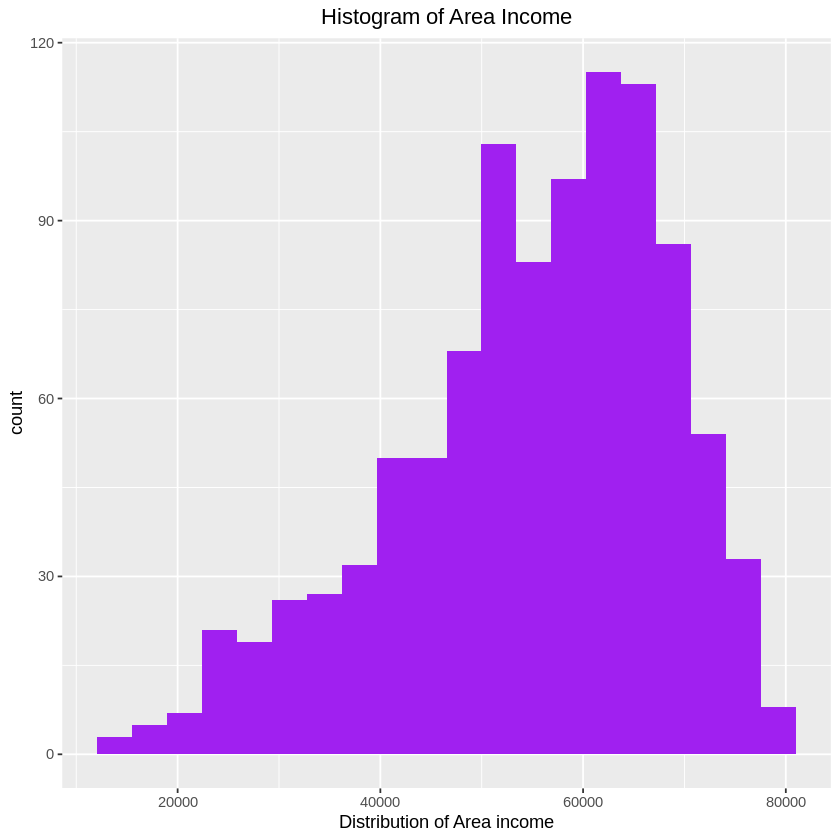

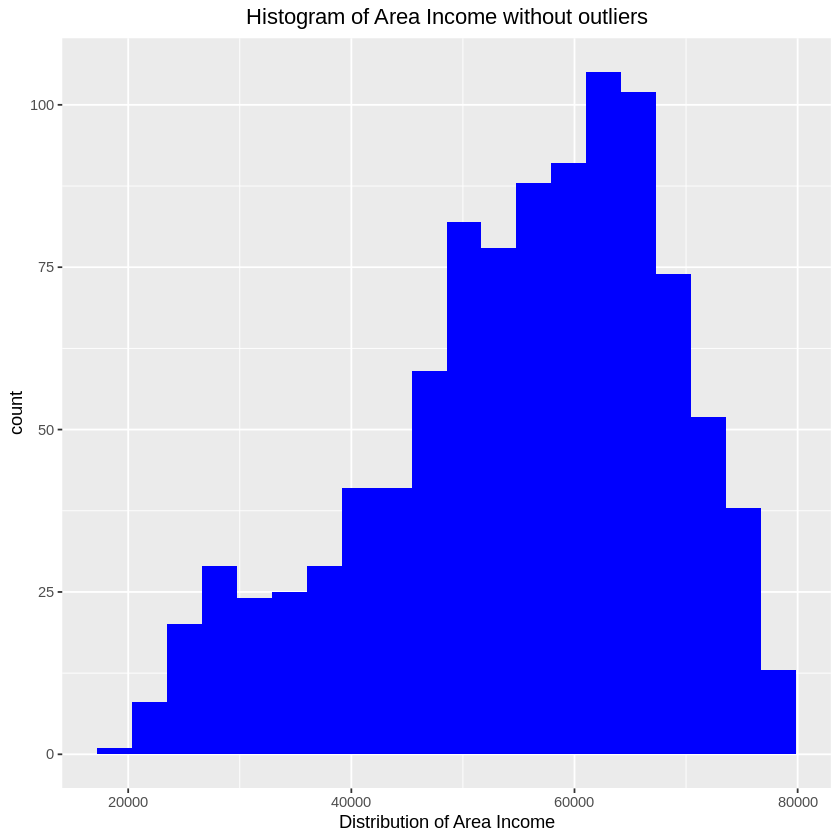

In [37]:
# Histogram of Area Income with outliers
ggplot(data = adverts, mapping = aes(x = area_income)) +
  geom_histogram(bins = 20, fill = "purple") +
  labs(x = "Distribution of Area income") +
  ggtitle("Histogram of Area Income") +
  theme(plot.title = element_text(hjust = 0.5))
 # Histogram of Area Income without outliers
ggplot(data = adverts, mapping = aes(x = x)) +
  geom_histogram(bins = 20, fill = "blue") +
  labs(x = "Distribution of Area Income") +
  ggtitle("Histogram of Area Income without outliers") +
  theme(plot.title = element_text(hjust = 0.5)) 

**Observation**: The Area Income is skewed to the right. It is important to note that it has outliers existing in the first quantile which is evident in the first bin of both histograms.

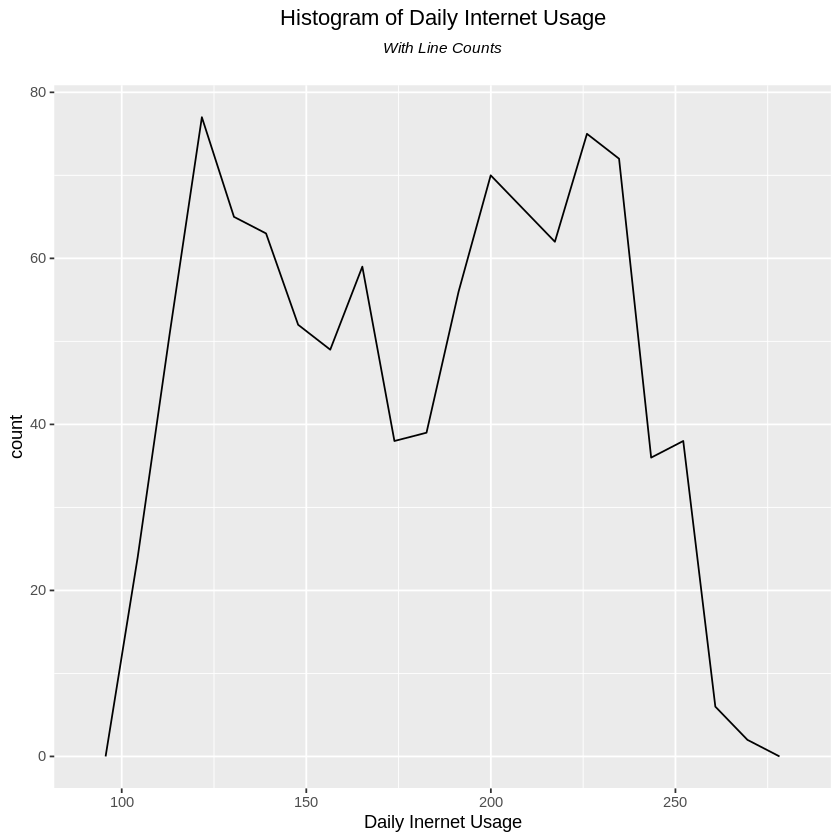

In [38]:
# Histogram of Daily internet Usage displaying count with lines
ggplot(data = adverts, mapping = aes(x =  daily_internet_usage )) +
  geom_freqpoly(bins = 20) +
  labs(x = "Daily Inernet Usage") +
  ggtitle(expression(atop("Histogram of Daily Internet Usage", atop(italic("With Line Counts", ""))))) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(plot.subtitle = element_text(hjust = 0.5))

**Observation**: It is evident that the Daily Internet Usage is relatively high which could be as a result of various factors which I will delve on to later in my analysis.

In [89]:
# Finding the mode of the city as it is a categorical variable
o <- ad_topic_line
sort(table(o))
print('The mode of ad topic line');names(table(o))[table(t)==max(table(o))]

o
                      Adaptive 24hour Graphic Interface 
                                                      1 
                         Adaptive asynchronous attitude 
                                                      1 
                 Adaptive context-sensitive application 
                                                      1 
                Adaptive contextually-based methodology 
                                                      1 
                   Adaptive demand-driven knowledgebase 
                                                      1 
                            Adaptive uniform capability 
                                                      1 
                             Advanced 24/7 productivity 
                                                      1 
                      Advanced 5thgeneration capability 
                                                      1 
                       Advanced didactic conglomeration 
                             

[1] "The mode of City"


[1] "Adaptive 24hour Graphic Interface"                      
  [2] "Adaptive asynchronous attitude"                         
  [3] "Adaptive context-sensitive application"                 
  [4] "Adaptive contextually-based methodology"                
  [5] "Adaptive demand-driven knowledgebase"                   
  [6] "Adaptive uniform capability"                            
  [7] "Advanced 24/7 productivity"                             
  [8] "Advanced 5thgeneration capability"                      
  [9] "Advanced didactic conglomeration"                       
 [10] "Advanced disintermediate data-warehouse"                
 [11] "Advanced exuding conglomeration"                        
 [12] "Advanced full-range migration"                          
 [13] "Advanced heuristic firmware"                            
 [14] "Advanced local task-force"                              
 [15] "Advanced modular Local Area Network"                    
 [16] "Advanced systemic productivity"                         
 [17] "Advanced web-enabled standardization"                   
 [18] "Ameliorated actuating workforce"                        
 [19] "Ameliorated bandwidth-monitored contingency"            
 [20] "Ameliorated client-driven forecast"                     
 [21] "Ameliorated coherent open architecture"                 
 [22] "Ameliorated contextually-based collaboration"           
 [23] "Ameliorated discrete extranet"                          
 [24] "Ameliorated exuding encryption"                         
 [25] "Ameliorated exuding solution"                           
 [26] "Ameliorated intermediate Graphical User Interface"      
 [27] "Ameliorated leadingedge help-desk"                      
 [28] "Ameliorated local workforce"                            
 [29] "Ameliorated tangible hierarchy"                         
 [30] "Ameliorated upward-trending definition"                 
 [31] "Ameliorated well-modulated complexity"                  
 [32] "Assimilated actuating policy"                           
 [33] "Assimilated discrete strategy"                          
 [34] "Assimilated encompassing portal"                        
 [35] "Assimilated fault-tolerant hub"                         
 [36] "Assimilated homogeneous service-desk"                   
 [37] "Assimilated hybrid initiative"                          
 [38] "Assimilated multi-state paradigm"                       
 [39] "Assimilated next generation firmware"                   
 [40] "Assimilated stable encryption"                          
 [41] "Automated client-driven orchestration"                  
 [42] "Automated coherent flexibility"                         
 [43] "Automated directional function"                         
 [44] "Automated full-range Internet solution"                 
 [45] "Automated mobile model"                                 
 [46] "Automated multi-state toolset"                          
 [47] "Automated object-oriented firmware"                     
 [48] "Automated stable help-desk"                             
 [49] "Automated static concept"                               
 [50] "Automated web-enabled migration"                        
 [51] "Balanced 4thgeneration success"                         
 [52] "Balanced actuating moderator"                           
 [53] "Balanced asynchronous hierarchy"                        
 [54] "Balanced contextually-based pricing structure"          
 [55] "Balanced discrete approach"                             
 [56] "Balanced disintermediate conglomeration"                
 [57] "Balanced dynamic application"                           
 [58] "Balanced empowering success"                            
 [59] "Balanced executive definition"                          
 [60] "Balanced heuristic approach"                            
 [61] "Balanced mobile Local Area Network"                     
 [62] "Balanced motivating help-desk"                          
 [63] "Balanced responsive open sy

**Observation**: The ad topic line has no mode.

In [39]:
# Finding the mode of the city as it is a categorical variable
t <- city
sort(table(t))
print('The mode of City');names(table(t))[table(t)==max(table(t))]

t
              Adamsbury                Adamside               Adamsstad 
                      1                       1                       1 
               Alanview           Alexanderfurt           Alexanderview 
                      1                       1                       1 
          Alexandrafort              Alexisland              Aliciatown 
                      1                       1                       1 
           Alvaradoport             Alvarezland              Amandafort 
                      1                       1                       1 
            Amandahaven              Amandaland                 Amyfurt 
                      1                       1                       1 
               Amyhaven         Andersonchester            Andersonfurt 
                      1                       1                       1 
            Andersonton           Andrewborough             Andrewmouth 
                      1                       1  

[1] "The mode of City"


[1] "Lisamouth"    "Williamsport"

**Observation**: The cities that have the most number of users visiting the site are Lisamouth and Williamsport.

This attribute city is bimodal.

In [40]:
# Finding the mode of the city as it is a categorical variable
y <- country
sort(table(y))
print('The mode of Country');names(table(y))[table(y)==max(table(y))]

y
                                              Aruba 
                                                  1 
                                            Bermuda 
                                                  1 
British Indian Ocean Territory (Chagos Archipelago) 
                                                  1 
                                         Cape Verde 
                                                  1 
                                            Germany 
                                                  1 
                                             Jordan 
                                                  1 
                                           Kiribati 
                                                  1 
                                            Lesotho 
                                                  1 
                                   Marshall Islands 
                                                  1 
                                         Mon

[1] "The mode of Country"


[1] "Czech Republic" "France"

**Observation**: The countries that have the most number of users visiting the site are Czech Republi and France. The attribute country is bimodal.

In [41]:
# install the package suitabe for date time attribute
install.packages("lubridate")
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [42]:
# Checking to confirm the the sttribute timestamp is in the correct format
class(timestamp)
# To view sample of the attribute
head(timestamp)

[1] "POSIXct" "POSIXt"

[1] "2016-03-27 00:53:11 UTC" "2016-04-04 01:39:02 UTC"
[3] "2016-03-13 20:35:42 UTC" "2016-01-10 02:31:19 UTC"
[5] "2016-06-03 03:36:18 UTC" "2016-05-19 14:30:17 UTC"

**Observation**: POSIXct stores both a date and time with an associated time zone. The default time zone selected, is the time zone that your computer is set to which is most often your local time zone.

POSIXct stores date and time in seconds with the number of seconds beginning at 1 January 1970. Negative numbers are used to store dates prior to 1970. Thus, the POSIXct format stores each date and time a single value in units of seconds. Storing the data this way, optimizes use in data.frames and speeds up computation, processing and conversion to other formats.

In [45]:
# Looking at the distribution of the site visit in a full week
table(format(timestamp,'%A'))


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
      155       140       126       159       142       122       156 

**Observation**: It is evident from the output above that the day of the week is not a determining factor when it comes to how often the users visited the site. There are days that were high relatively high and other were low. It is stochastic in nature.

In [46]:
# Checking to see the year within which the data was collected or rather documented
table(format(timestamp,'%Y'))


2016 
1000 

**Observation**: The data was collected for the year 2016.

In [47]:
# Checking for the distribution throughout the months
table(format(timestamp,'%B'))


   April February  January     July     June    March      May 
     147      160      147      101      142      156      147 

**Observation**: The data contains information for the year 2016 running from January to July.The distribution in the months is also random as well. From Janurary it kept increasing and suddenly decreased in July.

In [48]:
# checking the timezone in the timestamp column
table(format(timestamp,'%Z'))


 UTC 
1000 

**Observation**: All the data belong to the  Coordinated Universal Time.

# Bivariate Graphical Exploratory Data Analysis

### Covariance

In [49]:
# Finding the covariance between daily internet usage and area income
round(cov(daily_internet_usage, area_income))

[1] 198763

**Observation**: The covariance of daily internet usage and area income is about 198763; which indicates a positive linear relationship between the two variables

In [50]:
# Finding the covariance between age and area income
round(cov(age, area_income))

[1] -21521

**Observation**: There is a negative relationship between the age and the area income. Indicating that individuals who are advanced in age earned a low area income and young individuals have earn high area income.

In [51]:
# Finding the covariance between daily time spent on site and area income
round(cov(daily_time_spent_on_site, area_income))

[1] 66131

**Observation**: The covariance of daily time spent on site and area incomeis about 66131; which indicates a positive linear relationship between the two variables

In [52]:
# Finding the covariance between daily time spent on site and dail internet usage
round(cov(daily_time_spent_on_site, daily_internet_usage))

[1] 361

**Observation**: The covariance of daily time spent on site and daily internet usage is about 361; which indicates a positive linear relationship between the two variables

In [53]:
# Finding the covariance between daily time spent on site and dail internet usage
round(cov(age, daily_internet_usage))

[1] -142

In [54]:
# Finding the covariance between daily time spent on site and age
round(cov(daily_time_spent_on_site, age))

[1] -46

**Observation**: The value obtained of -41 indicates that the relationship between age and the daily internet usage is negative. Imply young people spend have more internet usage and those advanced in age have less.

Likewise, the relationship between daily time spent on site and age is also negative

In [55]:
# Finding the covariance between clicked on ad and age
round(cov(clicked_on_ad, age))

[1] 2

**Observation**: Even thought there is a negative relationship between the age and the daily time spent on site (and also daily internet usage), fro the output there seems to be a postive relationsip between the age and clicked on ad

In [56]:
# Finding the covariance between daily time spent on site and clicked on  ad
round(cov(daily_time_spent_on_site, clicked_on_ad))

[1] -6

**Observation**: There is a negative relationship between the daily time spent on site and clicked on as. This indicates that an individual spending a lot of time on the site has a high likelihood of clicking on the ad.

In [57]:
# Finding the covariance between daily internet usage and clicked on  ad
round(cov(daily_internet_usage, clicked_on_ad))

[1] -17

**Observation**: There is a negative relationship between clicked on ad and the daily internet usage implying that an individual with a high daily internet usage is more likely to to click on ad.

**NB**: Covariance measures the directional relationship between two attributes but cannot show the strength of the relationship between variables.In addition covariance  is sensitive to high volatility; where the attributes have a large values which is dependent on the metric measure the covariance will conequently be high. 

The correlation coefficient is a robust measure of the strength between two variables. 

### Correlation

In [58]:
# installing the relevant package for correlation
install.packages("Hmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’




In [59]:
library("Hmisc")
res2 <- rcorr(as.matrix(data_num))
res2

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




                         daily_time_spent_on_site   age area_income
daily_time_spent_on_site                     1.00 -0.33        0.31
age                                         -0.33  1.00       -0.18
area_income                                  0.31 -0.18        1.00
daily_internet_usage                         0.52 -0.37        0.34
male                                        -0.02 -0.02        0.00
clicked_on_ad                               -0.75  0.49       -0.48
                         daily_internet_usage  male clicked_on_ad
daily_time_spent_on_site                 0.52 -0.02         -0.75
age                                     -0.37 -0.02          0.49
area_income                              0.34  0.00         -0.48
daily_internet_usage                     1.00  0.03         -0.79
male                                     0.03  1.00         -0.04
clicked_on_ad                           -0.79 -0.04          1.00

n= 1000 


P
                         daily_time_spent_on_sit

In [60]:
# Installing the package that output the visual of correlation of attributes
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



corrplot 0.84 loaded



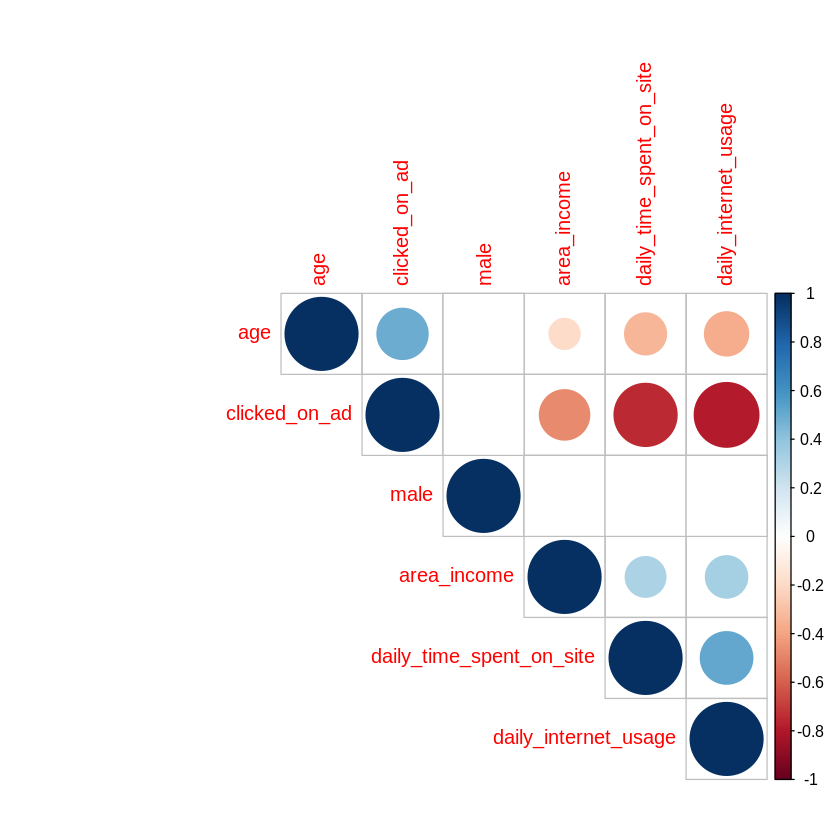

In [61]:
library(corrplot)
# Insignificant correlation are crossed
corrplot(res2$r, type="upper", order="hclust", 
         p.mat = res2$P, sig.level = 0.01, insig = "blank")
# Insignificant correlations are leaved blank
corrplot(res2$r, type="upper", order="hclust", 
         p.mat = res2$P, sig.level = 0.01, insig = "blank")

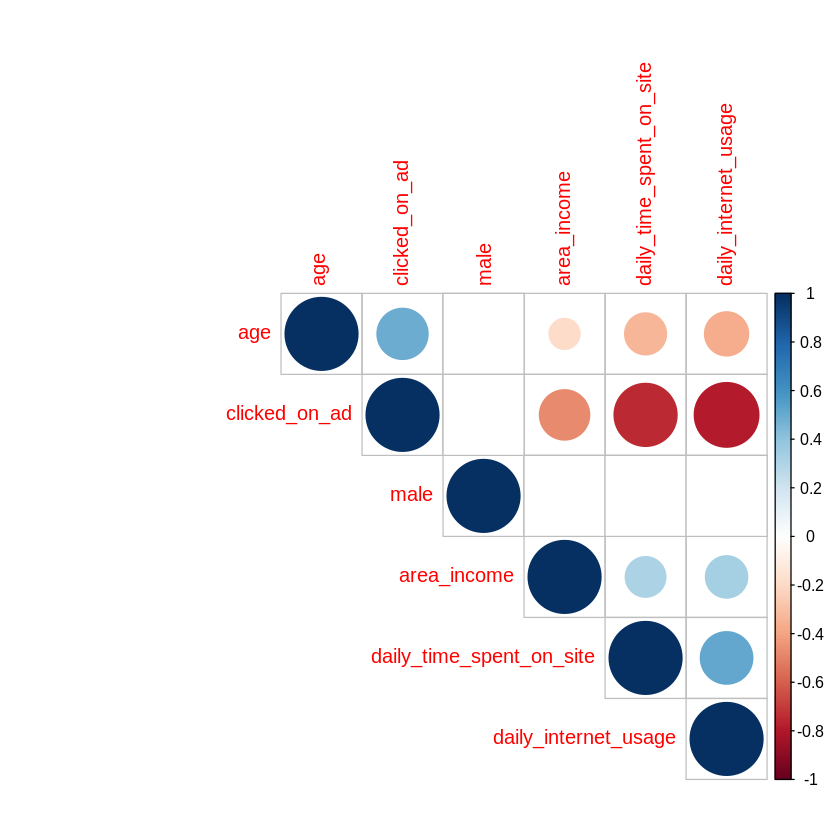

In [62]:
# Insignificant correlation are crossed
corrplot(res2$r, type="upper", order="hclust", 
         p.mat = res2$P, sig.level = 0.01, insig = "blank")
# Insignificant correlations are leaved blank
corrplot(res2$r, type="upper", order="hclust", 
         p.mat = res2$P, sig.level = 0.01, insig = "blank")

Positive correlations are displayed in ***blue*** and negative correlations in ***red color***. Color intensity and the size of the circle are proportional to the correlation coefficients. In the right side of the correlogram, the legend color shows the correlation coefficients and the corresponding colors.

From the corrplot above, there is a positive correlation between:
  *  Daily Time Spent on Site & Daily Internet Usage.
  *  Area income and Daily Internet Usage.
  *  Area income and Daily Time Spent on Site.
  *  Age and Clicked on Ad.

### Graphical Techniques

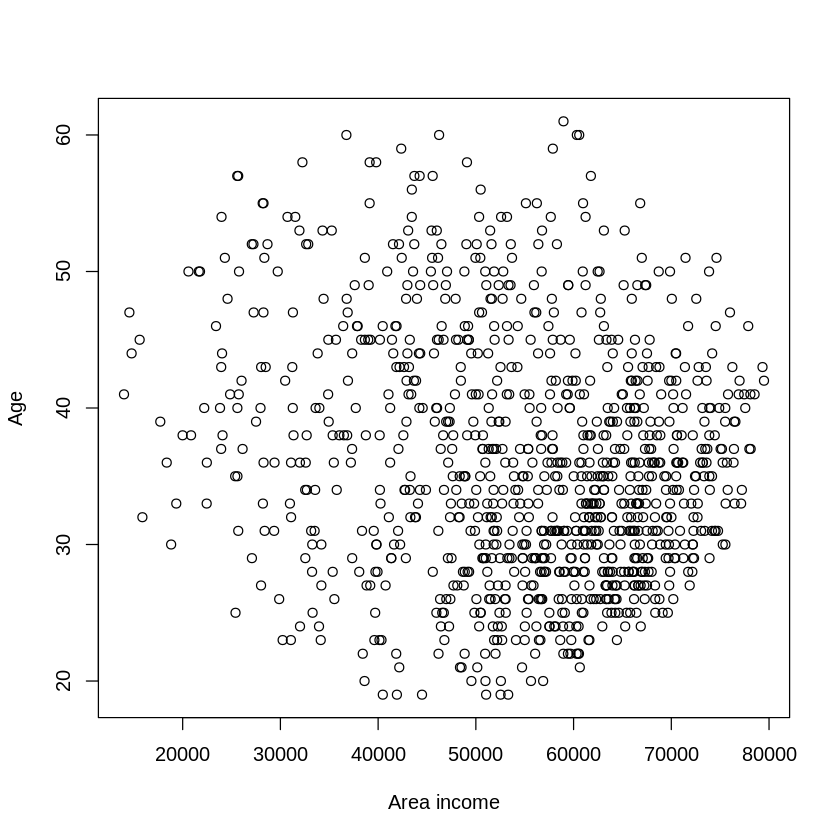

In [64]:
# plotting a  simple scatter plot to illustrate the relationship between the age and area income
plot(area_income,age, xlab="Area income", ylab="Age")

**Observation**: There is a negative relationship between the age and the area income.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



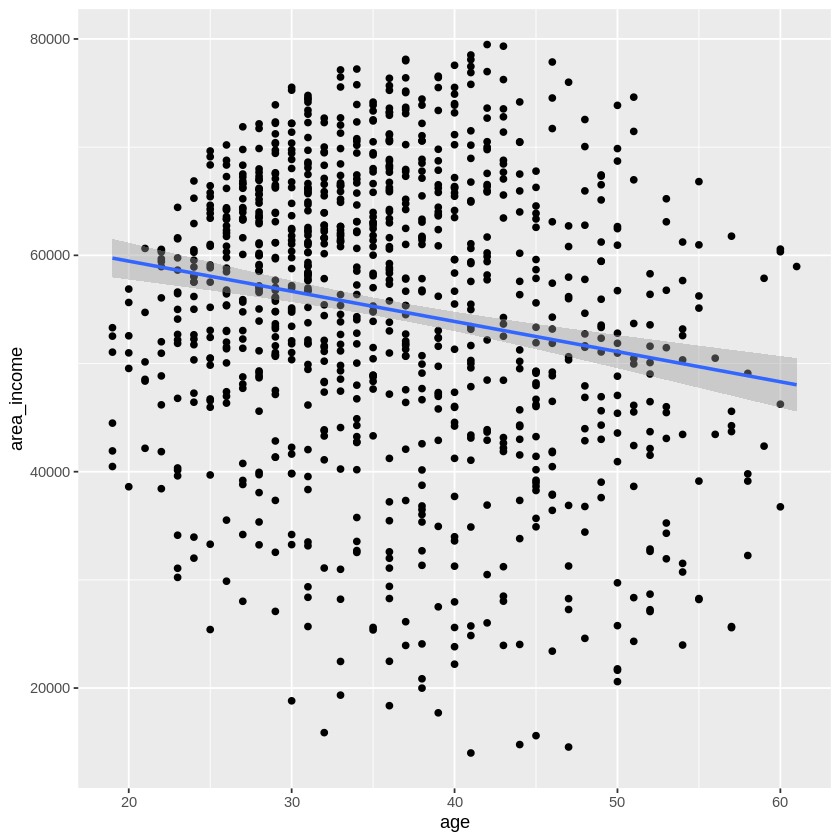

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



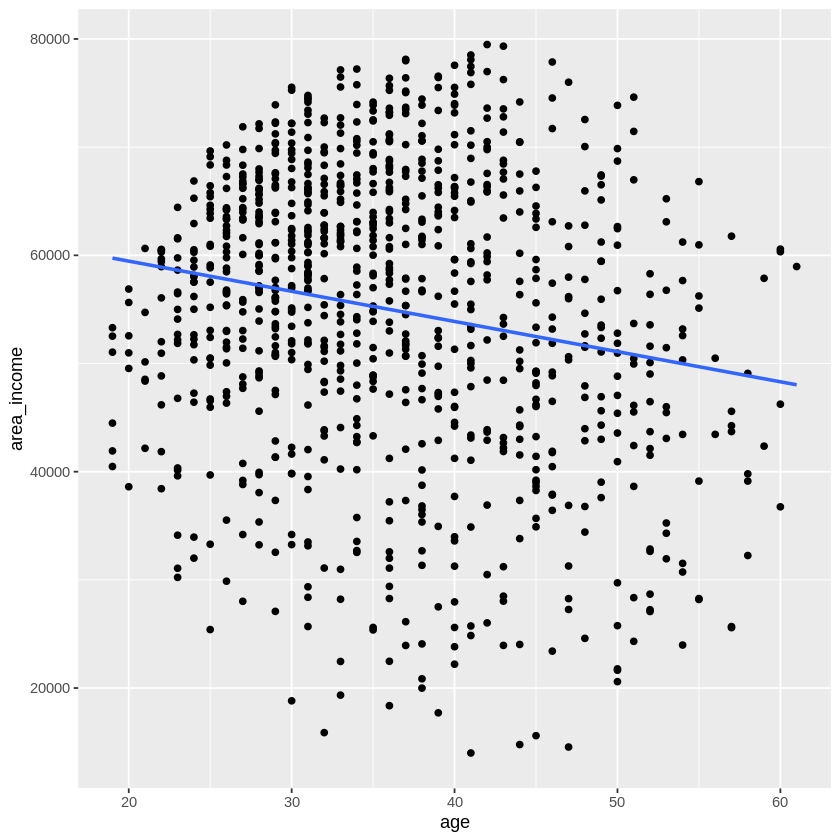

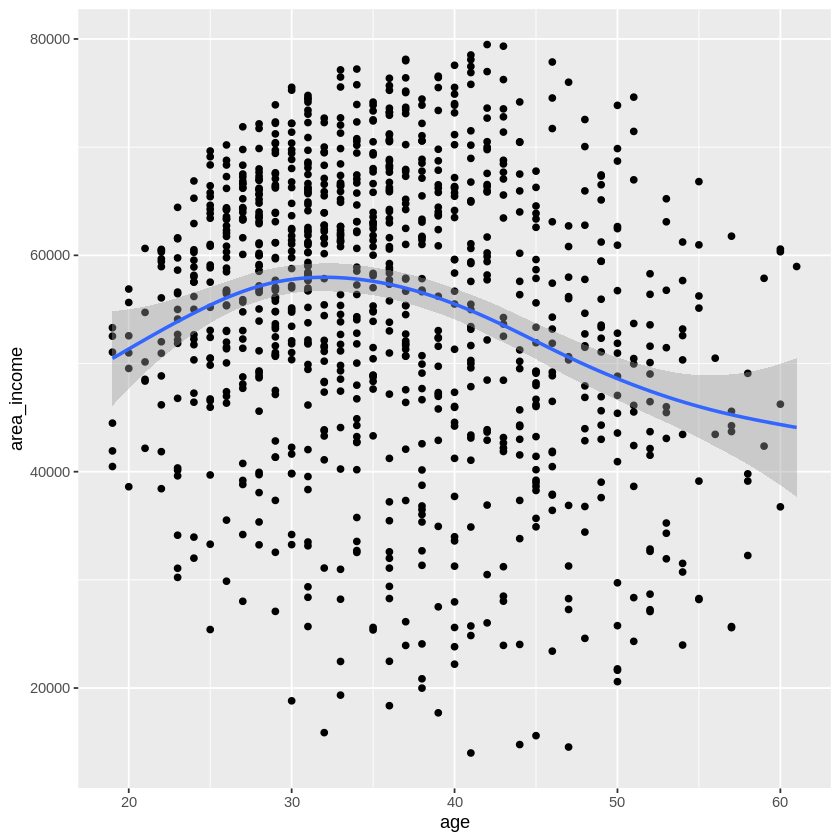

In [65]:
# plotting scatter plots together with the best line of fit to show the relationship between age and area income
# Add the regression line
ggplot(adverts, aes(x=age, y=area_income)) + 
  geom_point()+
  geom_smooth(method=lm)
# Remove the confidence interval
ggplot(adverts, aes(x=age, y=area_income)) + 
  geom_point()+
  geom_smooth(method=lm, se=FALSE)
# Loess method
ggplot(adverts, aes(x=age, y=area_income)) + 
  geom_point()+
  geom_smooth()

**Observation**: The best line of fit between area income and age is not linear but is polynomial.

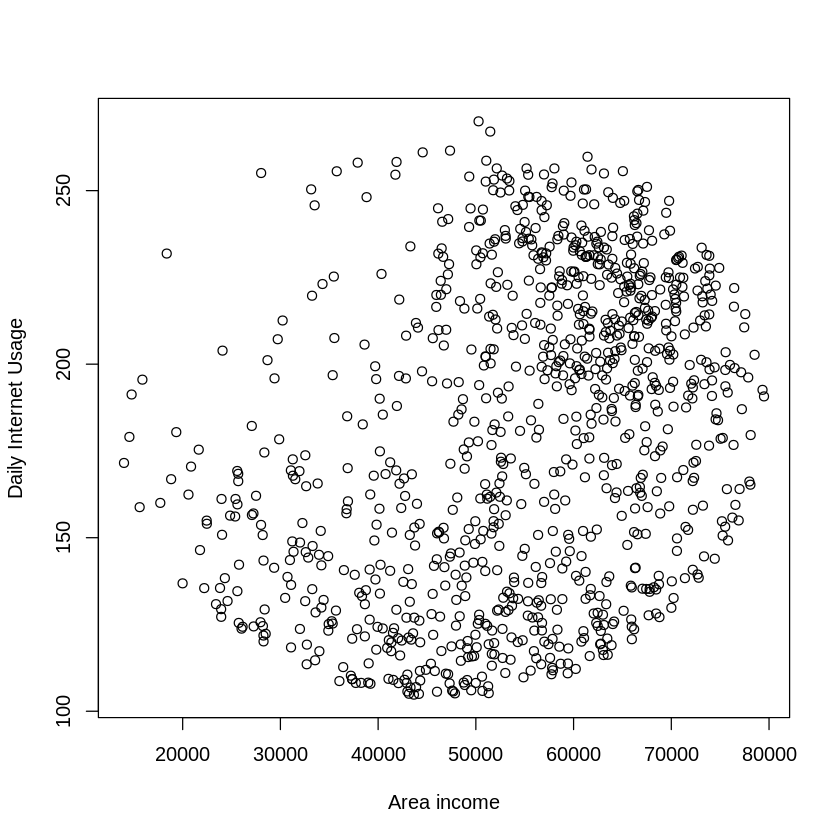

In [66]:
# plotting a  simple scatter plot to illustrate the relattionship between the Daily Internet Usage and area income
plot(area_income,daily_internet_usage, xlab="Area income", ylab="Daily Internet Usage")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



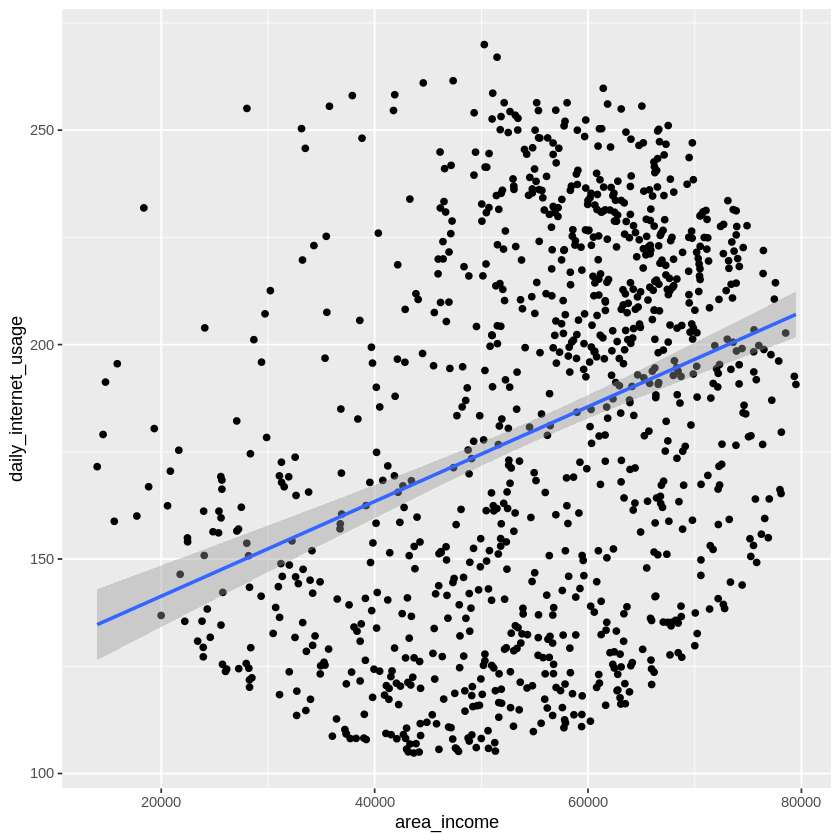

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



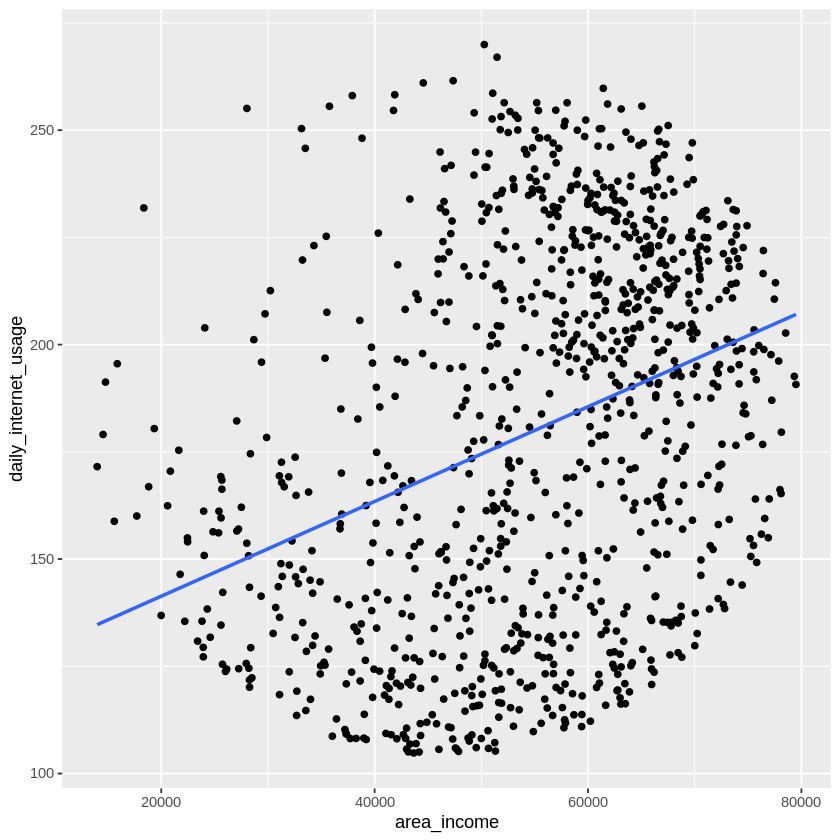

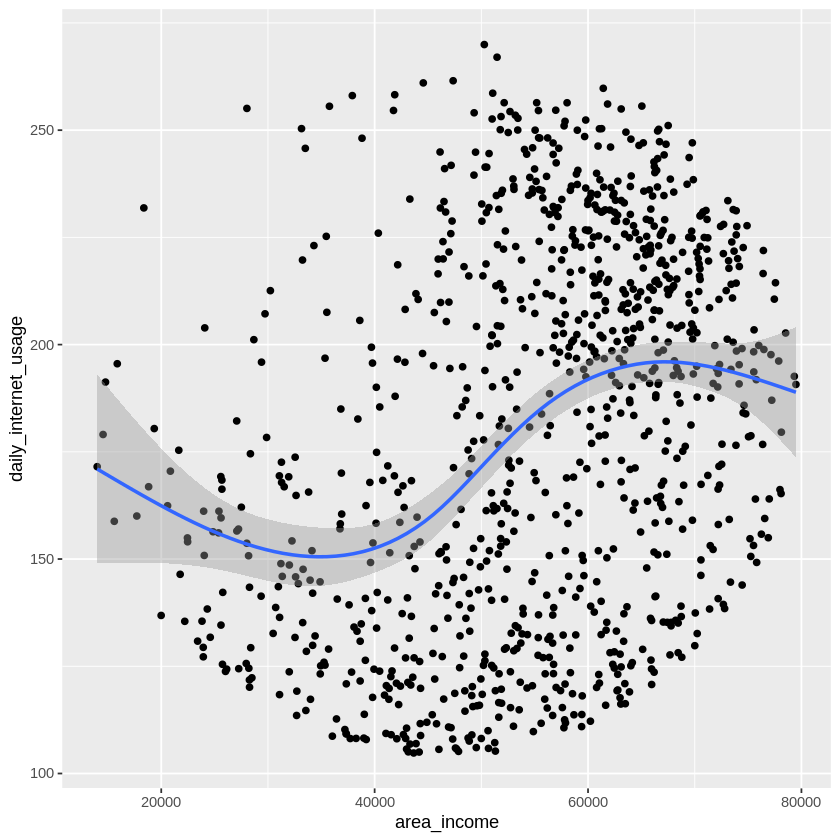

In [67]:
# plotting scatter plots together with the best line of fit to show the relationship between age and area income
# Add the regression line
ggplot(adverts, aes(x=area_income, y=daily_internet_usage)) + 
  geom_point()+
  geom_smooth(method=lm)
# Remove the confidence interval
ggplot(adverts, aes(x=area_income, y=daily_internet_usage)) + 
  geom_point()+
  geom_smooth(method=lm, se=FALSE)
# Loess method
ggplot(adverts, aes(x=area_income, y=daily_internet_usage)) + 
  geom_point()+
  geom_smooth()

**Observation**: The best line of fit between area income and daily internet usage is not linear.

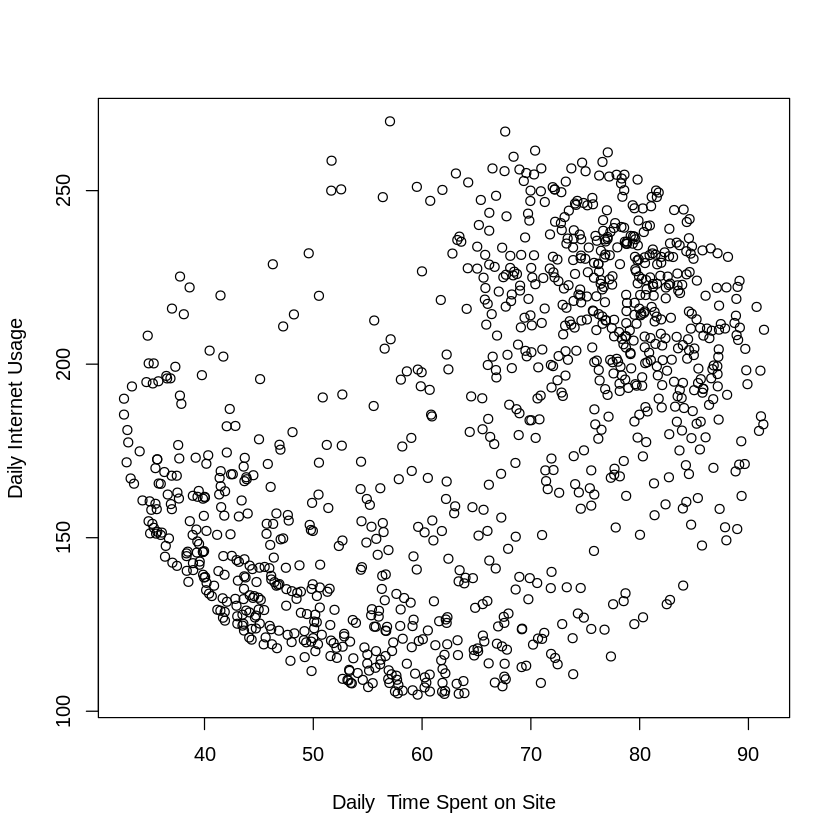

In [68]:
# plotting a  simple scatter plot to illustrate the relattionship between the Daily Internet Usage and Daily  Time Spent on Site
plot(daily_time_spent_on_site,daily_internet_usage, xlab="Daily  Time Spent on Site", ylab="Daily Internet Usage")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



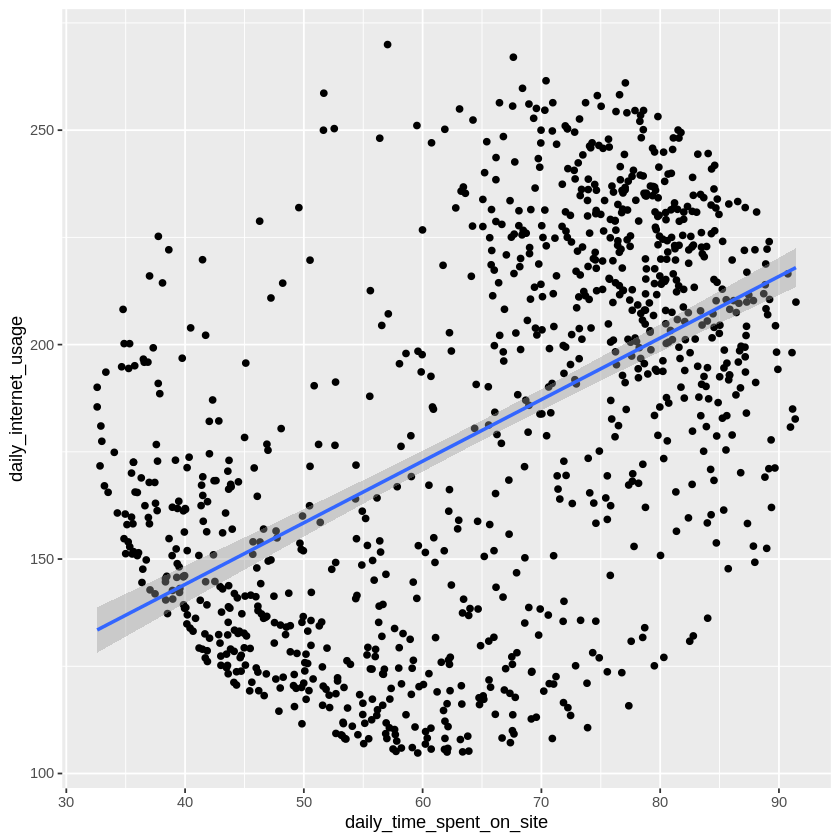

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



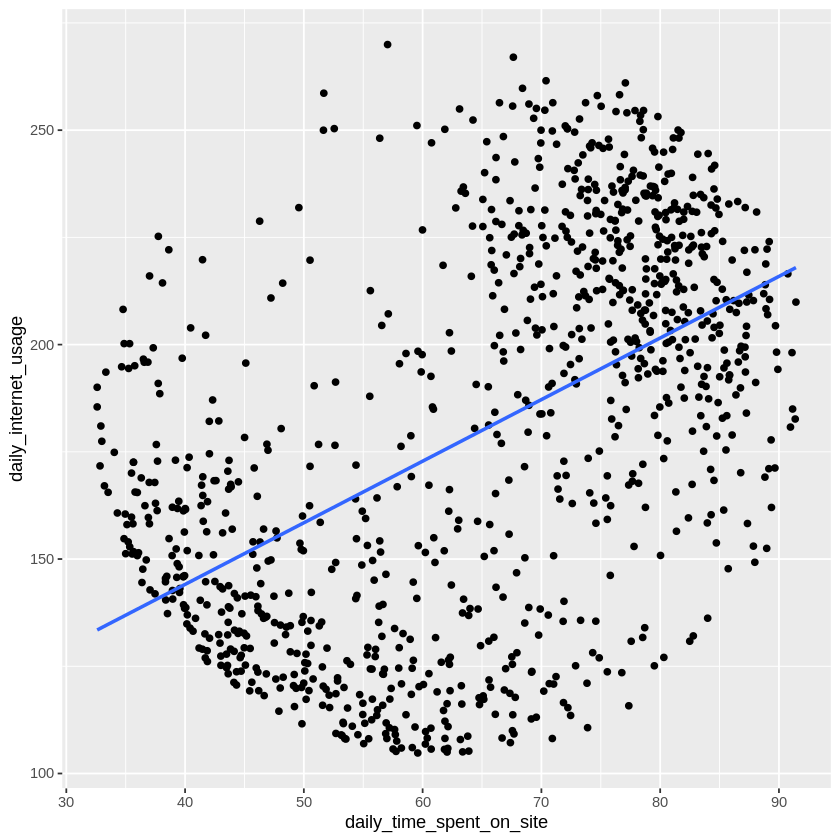

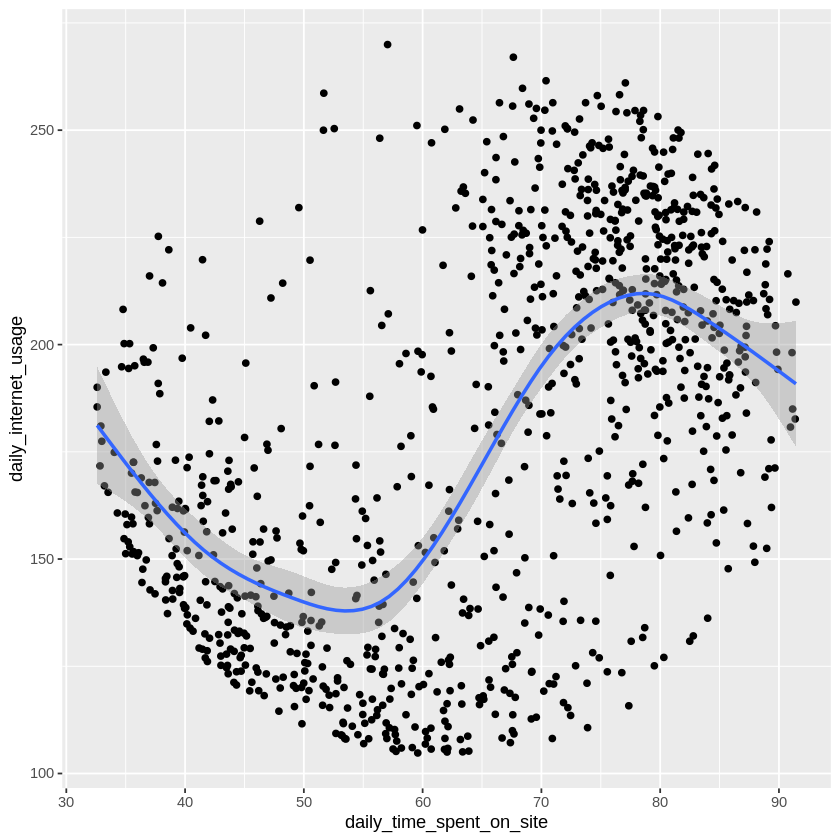

In [69]:
# plotting scatter plots together with the best line of fit to show the relationship between Daily Internet Usage and Daily  Time Spent on Site
# Add the regression line
ggplot(adverts, aes(x=daily_time_spent_on_site, y=daily_internet_usage)) + 
  geom_point()+
  geom_smooth(method=lm)
# Remove the confidence interval
ggplot(adverts, aes(x=daily_time_spent_on_site, y=daily_internet_usage)) + 
  geom_point()+
  geom_smooth(method=lm, se=FALSE)
# Loess method
ggplot(adverts, aes(x=daily_time_spent_on_site, y=daily_internet_usage)) + 
  geom_point()+
  geom_smooth()

**Observation**: The best line of fit between daily internet usage and daily time spent on site  is not linear but is polynomial

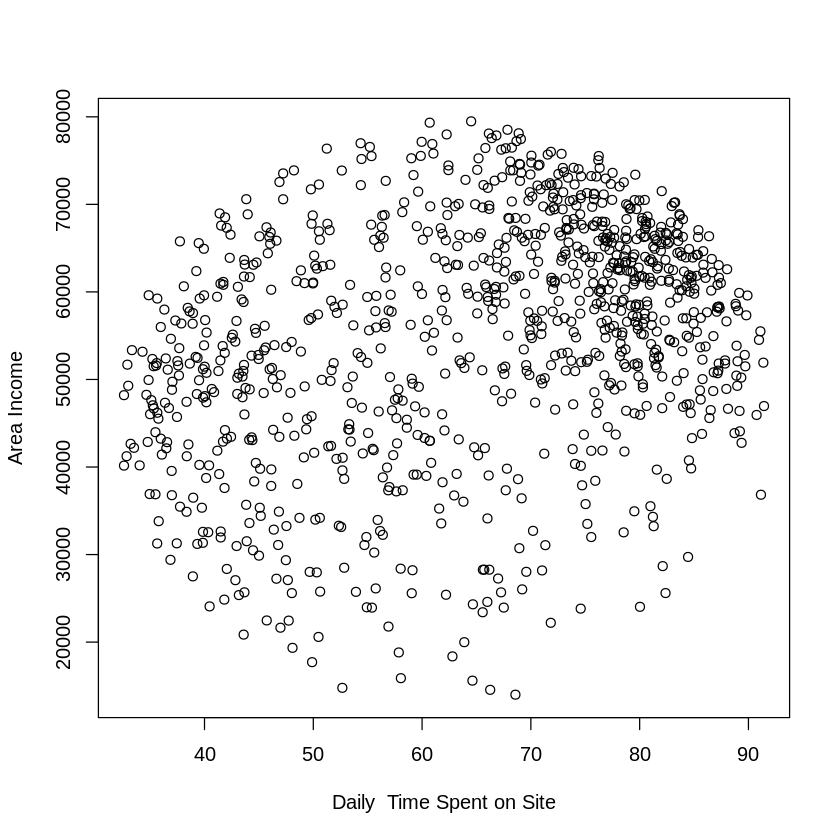

In [70]:
# plotting a  simple scatter plot to illustrate the relattionship between the Area Income and Daily  Time Spent on Site
plot(daily_time_spent_on_site,area_income, xlab="Daily  Time Spent on Site", ylab="Area Income")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



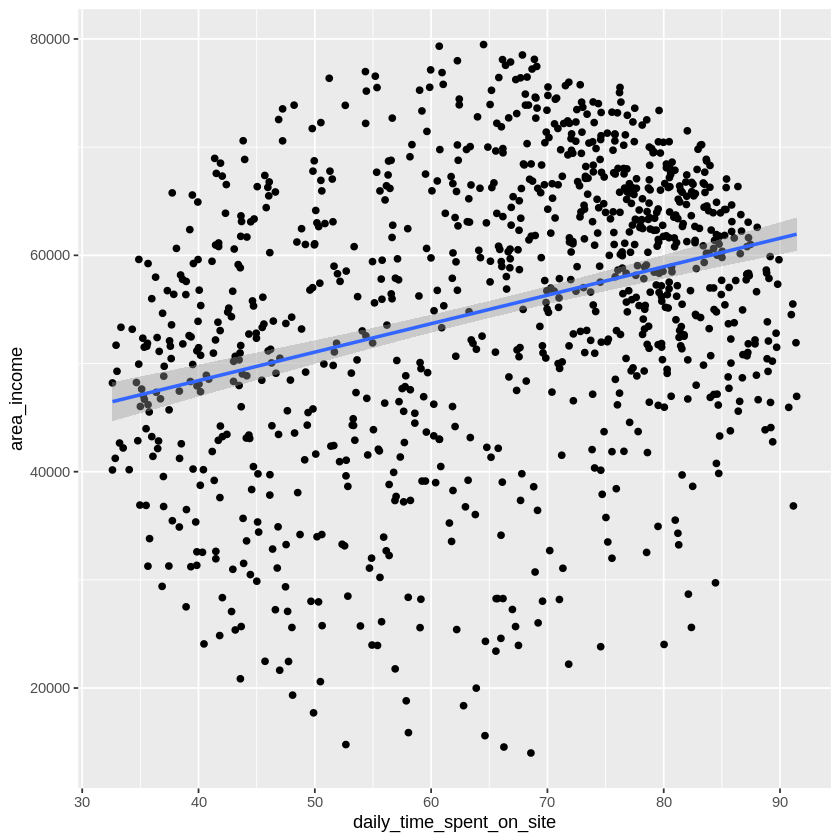

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



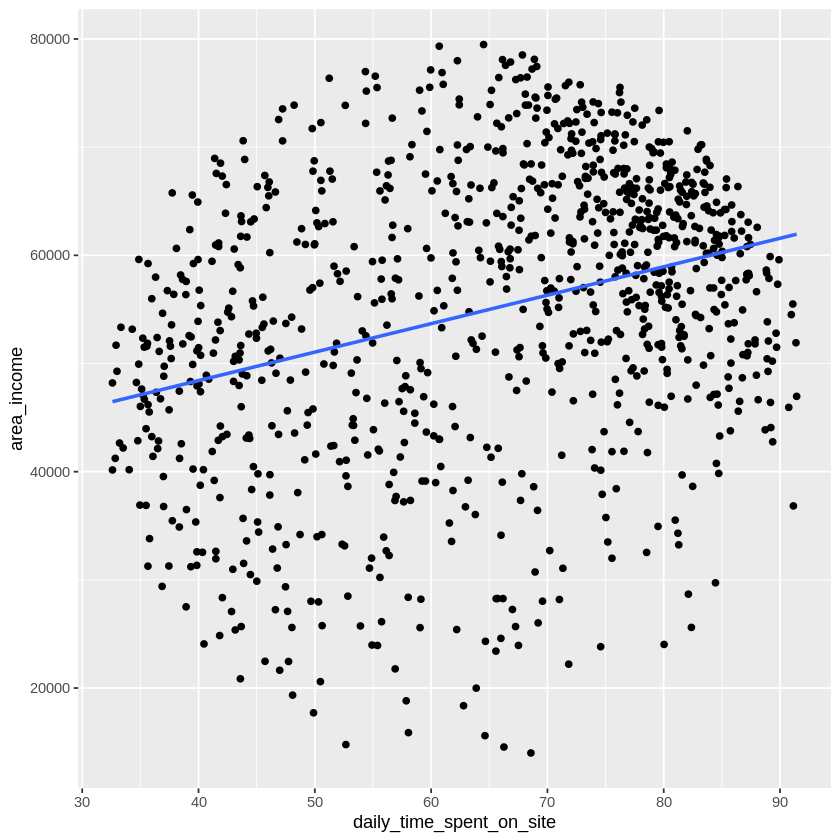

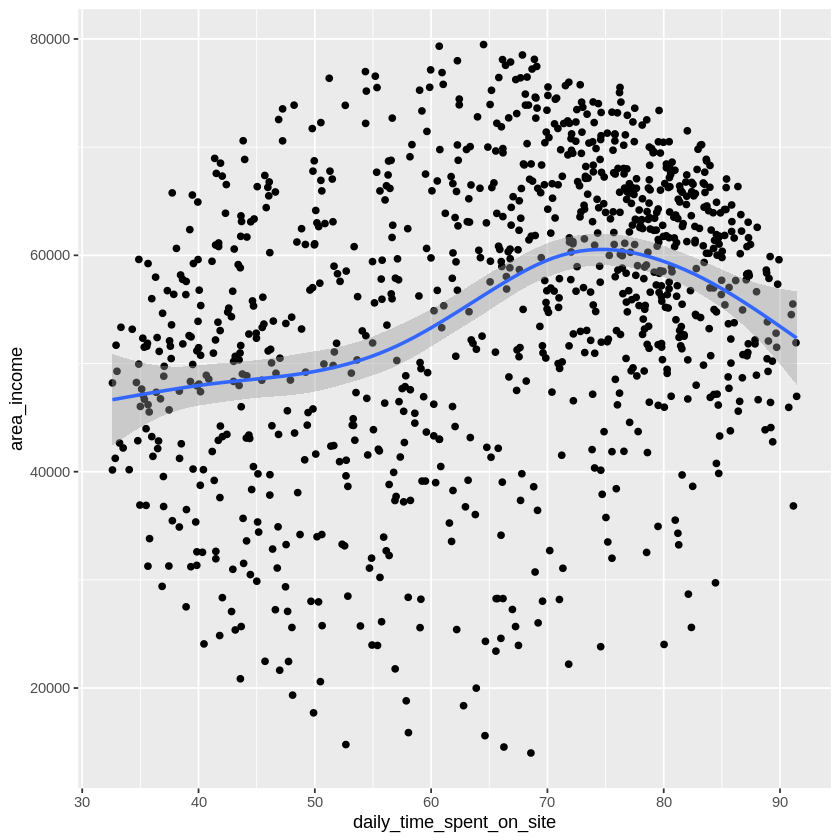

In [71]:
# plotting scatter plots with the best line of fit to show the relationship between area income and Daily  Time Spent on Site
# Add the regression line
ggplot(adverts, aes(x=daily_time_spent_on_site, y=area_income)) + 
  geom_point()+
  geom_smooth(method=lm)
# Remove the confidence interval
ggplot(adverts, aes(x=daily_time_spent_on_site, y=area_income)) + 
  geom_point()+
  geom_smooth(method=lm, se=FALSE)
# Loess method
ggplot(adverts, aes(x=daily_time_spent_on_site, y=area_income)) + 
  geom_point()+
  geom_smooth()

**Observation**: The best line of fit between area income and daily time spent on site is not linear but is polynomial

In [78]:
# summary table of the males and clicked on ad
table(male, clicked_on_ad)

    clicked_on_ad
male   0   1
   0 250 269
   1 250 231

**Observation**: The females represented by **1** in the males columns clicked the ad more compared to the number of males (**0**)who clicked on ad.

## Conclusion

From the analysis the following conclusions are evident:

*  The distribution of the individual variables are skewed.
*  There were more individuals who were young in the  dataset.
*  From the correlation analysis it can be concluded that:
      * Daily time spent on  site and daily internet usage have a strong relationship. More time spent on the internet will result into an increase in the internet usage.
      *  The area income and the daily internet usage have a strong relationship. This could be as a result of being able to cater for internet bundles due to earning a sustantial amount of area income. This is also observed in the relationship between area income and daily time spent on site.
      *  age and the clicked on ad have a positive relationship. This could imply that the young individuals would probably have less time and the older one would have more time. This could be further be investigated.
* The best lines of fit for:
      *  area income and daily time spent on site
      *  daily internet usage and daily time spent on site
      *  daily internet usage and area income
      *  area income and age
all showed a non linear best line of fit; which implies that the there could be a high level of heteroscedasticity. This requires further modelling and analysis.
*  More females clicked on ad compared to the number of males.

## Recommendations

To further add value to the analysis the following recommendations would be important:
*  The area income seemed to show a negative relationship; an increase in one resulted to a subsequent decrease in the other. It would be important to also find out the type of job that the individuals visiting the site were engaging in.
*  It would be interesting to know just why the number of females who clicked on ad were more than the number of males. More information should gathered on the same.
* An important element that would be paramount to investigate would be to find out the status of the individual whether married or single as it could also have an effect as to whether one would be interested in clicking the ad.